### Checking the Data

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 500)
sns.set(font_scale=2)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd gdrive/My Drive/Colab Notebooks/malwaredetection

/content/gdrive/My Drive/Colab Notebooks/malwaredetection


In [4]:
path=""

In [5]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'category',
        'IsSxsPassiveMode':                                     'category',
        'DefaultBrowsersIdentifier':                            'category',
        'AVProductStatesIdentifier':                            'category',
        'AVProductsInstalled':                                  'float32',
        'AVProductsEnabled':                                    'category',
        'HasTpm':                                               'category',
        'CountryIdentifier':                                    'category',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'category',
        'GeoNameIdentifier':                                    'category',
        'LocaleEnglishNameIdentifier':                          'category',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'category',
        'OsSuite':                                              'category',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'category',
        'AutoSampleOptIn':                                      'category',
        'PuaMode':                                              'category',
        'SMode':                                                'category',
        'IeVerIdentifier':                                      'category',
        'SmartScreen':                                          'category',
        'Firewall':                                             'category',
        'UacLuaenable':                                         'category',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'category',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float32',
        'Census_ProcessorManufacturerIdentifier':               'category',
        'Census_ProcessorModelIdentifier':                      'category',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'category',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'category',
        'Census_OSBuildRevision':                               'category',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'category',
        'Census_OSUILocaleIdentifier':                          'category',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'category',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'category',
        'Census_IsFlightsDisabled':                             'category',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'category',
        'Census_FirmwareManufacturerIdentifier':                'category',
        'Census_FirmwareVersionIdentifier':                     'category',
        'Census_IsSecureBootEnabled':                           'category',
        'Census_IsWIMBootEnabled':                              'category',
        'Census_IsVirtualDevice':                               'category',
        'Census_IsTouchEnabled':                                'category',
        'Census_IsPenCapable':                                  'category',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'category',
        'Wdft_IsGamer':                                         'category',
        'Wdft_RegionIdentifier':                                'category',
        'HasDetections':                                        'int8'
        }

In [6]:
train = pd.read_csv(path + "train.csv", dtype=dtypes)
test = pd.read_csv(path + "test.csv", dtype=dtypes)

In [7]:
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
stats_df.sort_values('Percentage of missing values', ascending=False).head(83)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
28,PuaMode,1,99.984324,99.984324,category
41,Census_ProcessorClass,3,99.614429,99.614429,category
8,DefaultBrowsersIdentifier,562,94.860937,94.860937,category
68,Census_IsFlightingInternal,1,82.738978,82.738978,category
52,Census_InternalBatteryType,29,70.499886,70.499886,category
71,Census_ThresholdOptIn,2,63.118031,63.118031,category
75,Census_IsWIMBootEnabled,1,63.023797,63.023797,category
31,SmartScreen,12,36.583059,52.520212,category
15,OrganizationIdentifier,45,30.946401,47.175242,category
29,SMode,2,6.732778,93.198880,category


We can drop the following columns:

Columns with more than 90% data with missing values : PuaMode, Census_ProcessorClass, DefaultBrowsersIdentifier 	

Columns with only one unique value in them: Census_IsFlightingInternal	,Census_IsWIMBootEnabled

In [8]:
column = train.columns
numeric_cols = train._get_numeric_data().columns
categorical_cols = list(set(column) - set(numeric_cols))

In [9]:
print("Number of Categorical columns:",len(categorical_cols))
print("Number of Numeric columns:", len(numeric_cols))

Number of Categorical columns: 70
Number of Numeric columns: 13


### Dropping unnecessary features - null/single value dominated columns

In [10]:
if(len(train)==train.MachineIdentifier.nunique()):
  print(True)
else:
  print(False)

True


Since MachineIdentifier is a unique key, we can drop it.

In [11]:
print(train['HasDetections'].value_counts())

0    482571
1     85159
Name: HasDetections, dtype: int64


Our Target value is very imbalanced. So we'll have to take care of this either using SMOTE or K-fold stratification or both, while training the model.

In [12]:
train.IsBeta.value_counts()

0    567729
1         1
Name: IsBeta, dtype: int64

Since most of isBeta is the same value, it doesn't make sense to keep it.

In [13]:
train.Census_IsFlightsDisabled.value_counts()

0.0    557551
1.0        11
Name: Census_IsFlightsDisabled, dtype: int64

Even for Census_IsFlightsDisabled, most of the data is the same value.

In [14]:
train.AutoSampleOptIn.value_counts()

0    567717
1        13
Name: AutoSampleOptIn, dtype: int64

Even for AutoSampleOptIn, most of the data is the same value.

In [15]:
train.Census_OSArchitecture.value_counts()

amd64    507540
x86       60152
arm64        38
Name: Census_OSArchitecture, dtype: int64

In [16]:
train.Processor.value_counts()

x64      507417
x86       60275
arm64        38
Name: Processor, dtype: int64

Since Processor and Census_OSArchitecture has similar values, we can drop one of them ( We decided to drop Census_OSArchitecture)

In [17]:
train.CityIdentifier.nunique()

39799

Since, CityIdentifier has many unique values and it would be difficult to group or categorize these values -- we are dropping this column.

In [18]:
train.Census_InternalBatteryNumberOfCharges.value_counts(normalize=True, dropna=False).cumsum().head()

0.000000e+00    0.568522
4.294967e+09    0.816878
NaN             0.845150
1.000000e+00    0.851819
2.000000e+00    0.855186
Name: Census_InternalBatteryNumberOfCharges, dtype: float64

In [19]:
train.Census_InternalBatteryType.value_counts(normalize=True, dropna=False).cumsum().head()

NaN     0.704999
lion    0.937500
li-i    0.965499
#       0.985830
lip     0.992537
Name: Census_InternalBatteryType, dtype: float64

For both Census_InternalBatteryNumberOfCharges and Census_InternalBatteryType, we are not sure how battery related information would help us detect malware. So it will be dropped. 
Census_InternalBatteryNumberOfCharges may help us predict the age of the computer which may or may not help us. We may drop this later if this doesnt add any value



In [20]:
train.Census_OSSkuName.value_counts(normalize=True, dropna=False).cumsum().head()

CORE                    0.404493
PROFESSIONAL            0.754727
CORE_SINGLELANGUAGE     0.964069
CORE_COUNTRYSPECIFIC    0.982715
EDUCATION               0.987151
Name: Census_OSSkuName, dtype: float64

In [21]:
train.Census_OSEdition.value_counts(normalize=True, dropna=False).cumsum().head()

Core                     0.404493
Professional             0.748963
CoreSingleLanguage       0.958345
CoreCountrySpecific      0.977019
ProfessionalEducation    0.982724
Name: Census_OSEdition, dtype: float64

Since Census_OSSkuName and Census_OSEdition has effectively the same data in it, we will avoid redundancy and drop Census_OSSkuName

### Visualization - plotting and analyzing different columns and the values in the dataset

In [22]:
train.Census_TotalPhysicalRAM.value_counts(normalize='True').cumsum().head(10)

4096.0     0.465192
8192.0     0.699492
2048.0     0.839141
16384.0    0.893741
6144.0     0.937704
3072.0     0.956547
12288.0    0.973192
1024.0     0.983327
32768.0    0.989331
24576.0    0.990479
Name: Census_TotalPhysicalRAM, dtype: float64

Instead of converting the values with lower count into the same category, we can divide them into buckets. Most of the sizes do not make sense and can also be errors. The ramsizes can thus, be mapped to the nearest bucket value as follows: (512,1024,2048,4096,8192,16*1024,32*1024,65536)

In [23]:
train.Census_ProcessorCoreCount.value_counts(normalize=True).cumsum()

4.0      0.604540
2.0      0.878868
8.0      0.968825
1.0      0.979105
12.0     0.988286
6.0      0.995499
16.0     0.997439
3.0      0.999080
24.0     0.999326
32.0     0.999558
20.0     0.999736
40.0     0.999786
36.0     0.999821
48.0     0.999855
28.0     0.999885
5.0      0.999908
56.0     0.999929
10.0     0.999949
64.0     0.999966
7.0      0.999975
72.0     0.999981
112.0    0.999984
44.0     0.999988
9.0      0.999991
128.0    0.999993
14.0     0.999995
22.0     0.999996
30.0     0.999998
88.0     1.000000
Name: Census_ProcessorCoreCount, dtype: float64

Instead of converting the values with lower count into the same category, we can divide them into buckets. The processor_counts can thus, be mapped to the nearest bucket value as follows: (1,2,4,8,16,32)

In [24]:
train.Census_InternalPrimaryDisplayResolutionHorizontal.value_counts(normalize=True).cumsum().head(10)

1366.0    0.508700
1920.0    0.747677
1280.0    0.814601
1600.0    0.870585
1024.0    0.911703
1440.0    0.930746
1360.0    0.944644
1680.0    0.956621
2560.0    0.964396
2736.0    0.970869
Name: Census_InternalPrimaryDisplayResolutionHorizontal, dtype: float64

In [25]:
train.Census_InternalPrimaryDisplayResolutionVertical.value_counts(normalize=True).cumsum().head(10)

768.0     0.561187
1080.0    0.790350
900.0     0.863811
800.0     0.900098
1024.0    0.921562
1050.0    0.933847
1200.0    0.943909
1440.0    0.953090
600.0     0.961958
1824.0    0.968431
Name: Census_InternalPrimaryDisplayResolutionVertical, dtype: float64

Instead of converting the values with lower count into the same category, we can divide them into buckets. The Resolution can thus, be mapped to the nearest bucket value as follows:
Horizontal: (1024,1280,1366,1440,1600,1920,2560,3440) 
Vertical: (540,768,900,1080,1200,1440,2048)

In [26]:
def plot_category_percent_of_target(df, col, numberToShow=20):
    fig, ax = plt.subplots(1, 1, figsize=(12,8))
    cat_percent = df[[col, 'HasDetections']].groupby(col, as_index=False).mean()
    cat_size = df[col].value_counts().reset_index(drop=False)
    cat_size.columns = [col, 'count']
    cat_percent = cat_percent.merge(cat_size, on=col, how='left')
    cat_percent['HasDetections'] = cat_percent['HasDetections'].fillna(0)
    cat_percent = cat_percent.sort_values(by='count', ascending=False)[:numberToShow]
    sns.barplot(ax=ax, x='HasDetections', y=col, data=cat_percent, order=cat_percent[col])

    for i, p in enumerate(ax.patches):
        ax.annotate('{}'.format(cat_percent['count'].values[i]), (p.get_width(), p.get_y()+0.5), fontsize=20)

    plt.xlabel('% of HasDetections(target)')
    plt.ylabel(col)
    plt.show()

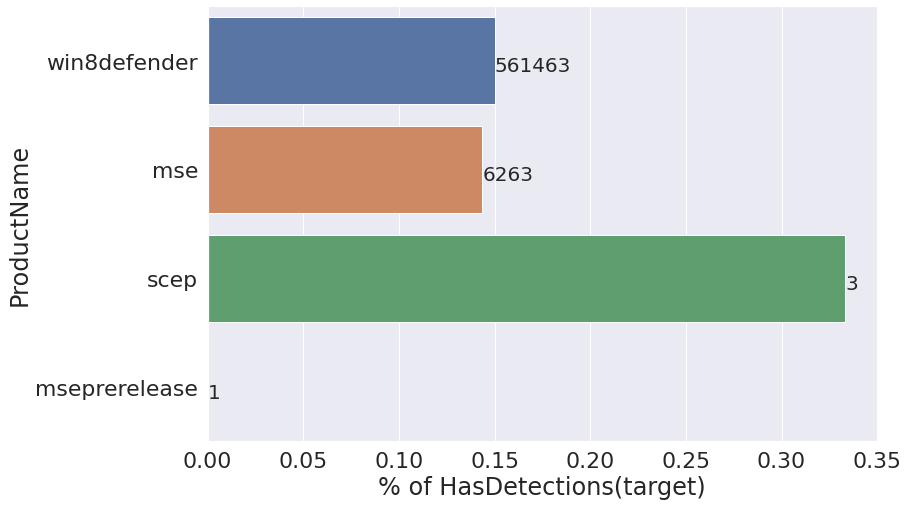

In [27]:
plot_category_percent_of_target(train, 'ProductName')

The figure shows the percentage of hasDetections for each category of the feature ProductName. It also shows the total count of different categories. 


Since there are categories with very low count, we can merge them together and create a new category called "OTHER"

**Product Name**:Categorical,Unbalanced,0% null values, Not dropping it.

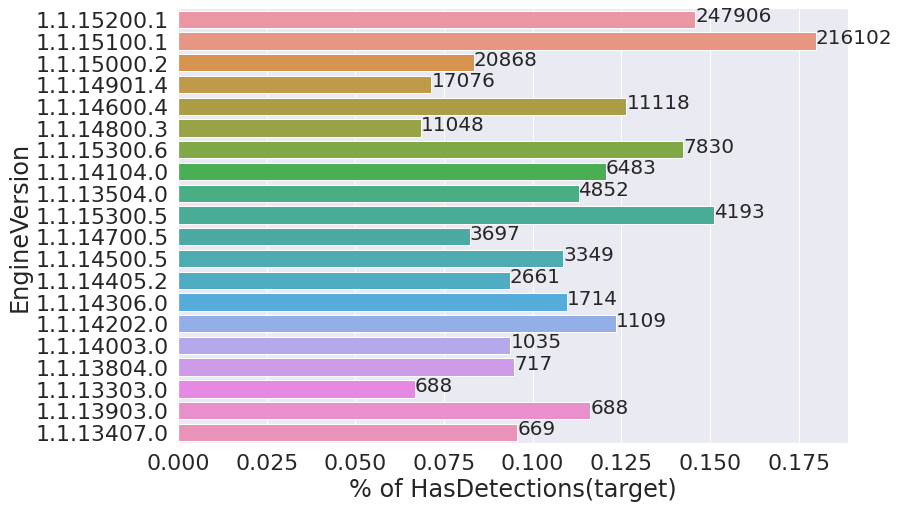

In [28]:
plot_category_percent_of_target(train, 'EngineVersion')

In [29]:
train.EngineVersion.value_counts(normalize=True).head(10)

1.1.15200.1    0.436662
1.1.15100.1    0.380642
1.1.15000.2    0.036757
1.1.14901.4    0.030078
1.1.14600.4    0.019583
1.1.14800.3    0.019460
1.1.15300.6    0.013792
1.1.14104.0    0.011419
1.1.13504.0    0.008546
1.1.15300.5    0.007386
Name: EngineVersion, dtype: float64

The values start from 1.1.X.X but we can extract the third and the fourth part of the string to get more features. 
Since many categories have a low count, we can combine those together and categorise as "OTHER"


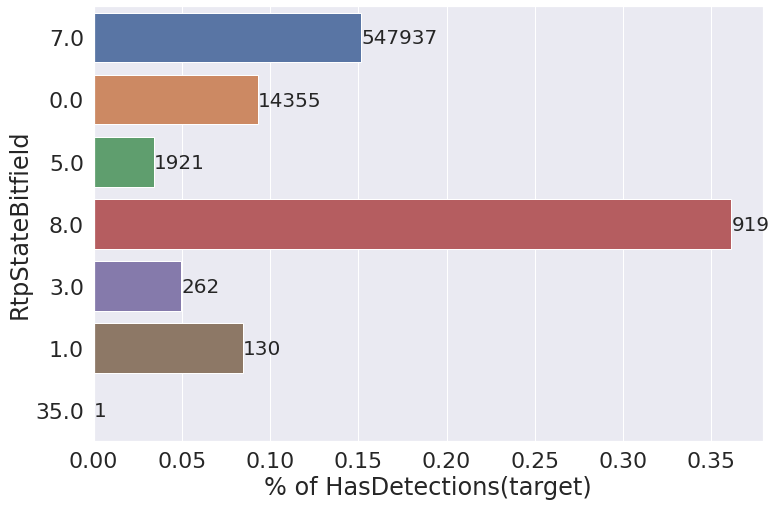

In [30]:
plot_category_percent_of_target(train, 'RtpStateBitfield')

We can categorize this column, and all the categories with low count along with null values are together put into one category called "OTHER"

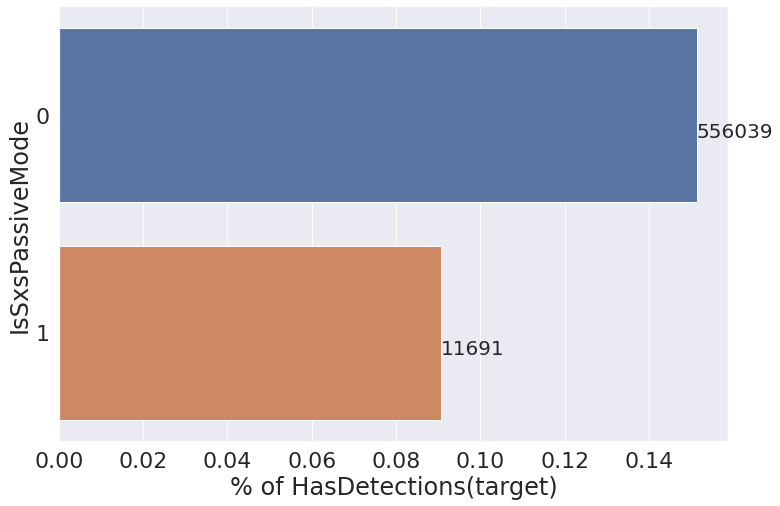

In [31]:
plot_category_percent_of_target(train, 'IsSxsPassiveMode')

IsSxsPassiveMode has no null values and we can convert its dtype to category. No other change is needed.

In [32]:
train['AVProductsInstalled'].value_counts()

1.0    367844
2.0    179174
3.0     17179
4.0       747
5.0        40
6.0         2
0.0         1
Name: AVProductsInstalled, dtype: int64

Again, for this feature,we change the dtype to "category" and categories with lower count are combined together into one category called "other"

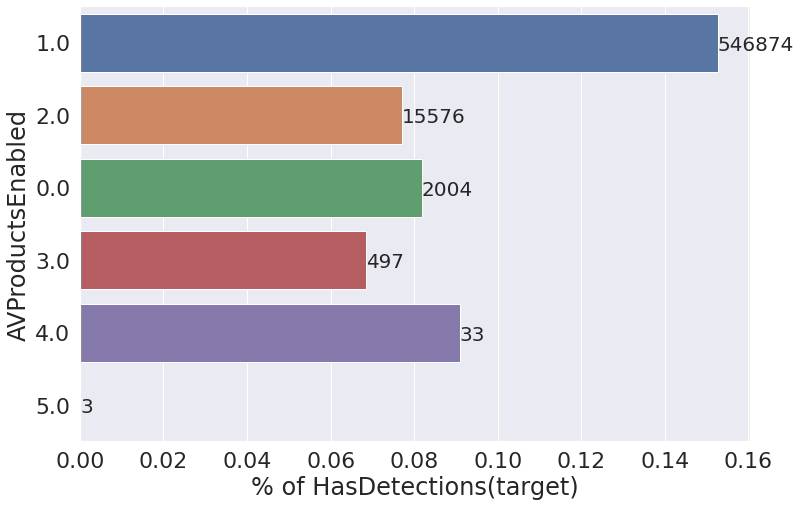

In [33]:
plot_category_percent_of_target(train, 'AVProductsEnabled')

AVProductsEnabled : converted to "Category" type and then categories with low count are all grouped together into "other"

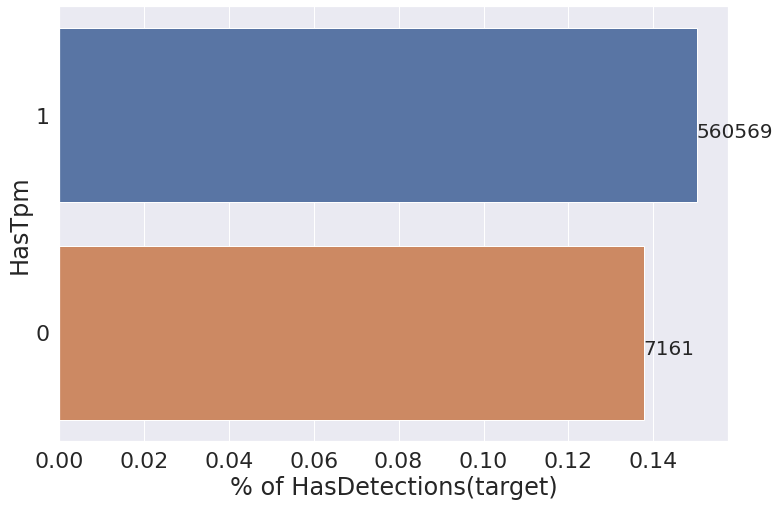

In [34]:
plot_category_percent_of_target(train, 'HasTpm')

In [35]:
train.HasTpm.isnull().sum()

0

There are no null values. No changes needed.

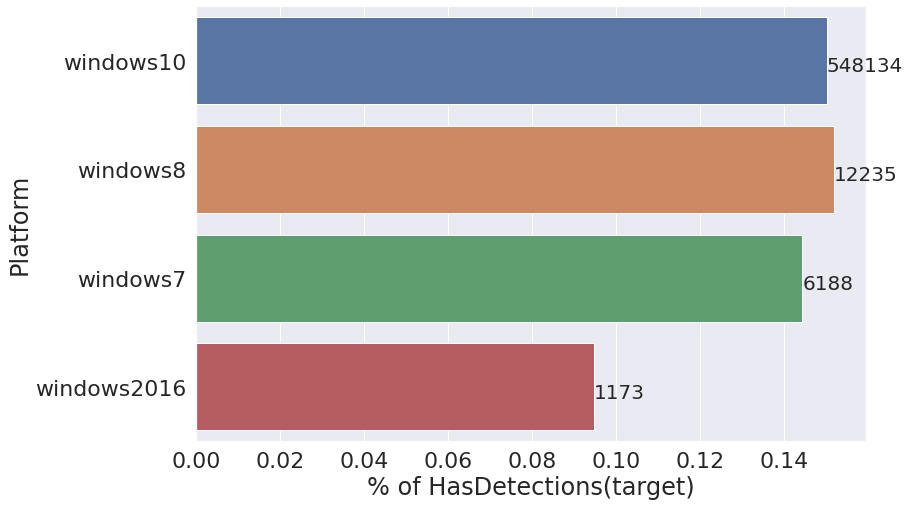

In [36]:
plot_category_percent_of_target(train, 'Platform')

In [37]:
train.Platform.isnull().sum()

0

There are no null values. No changes needed. 

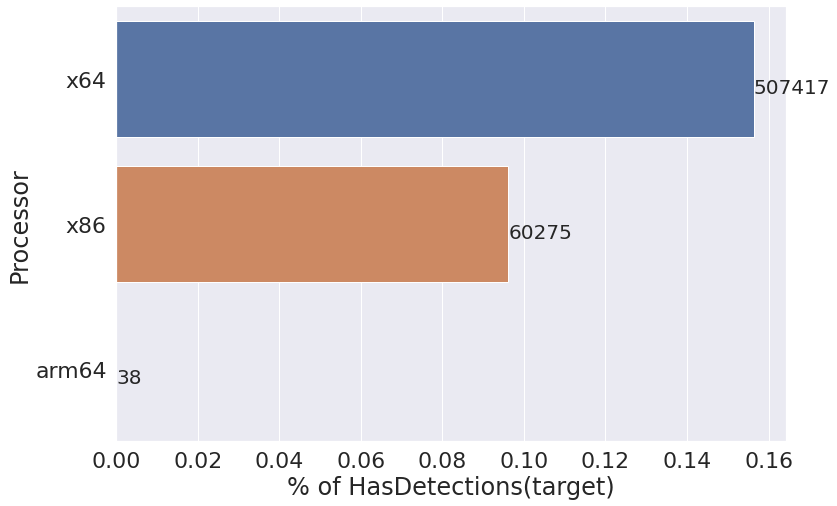

In [38]:
plot_category_percent_of_target(train, 'Processor')

Processor :arm64 has very low number of detections. It has no null values

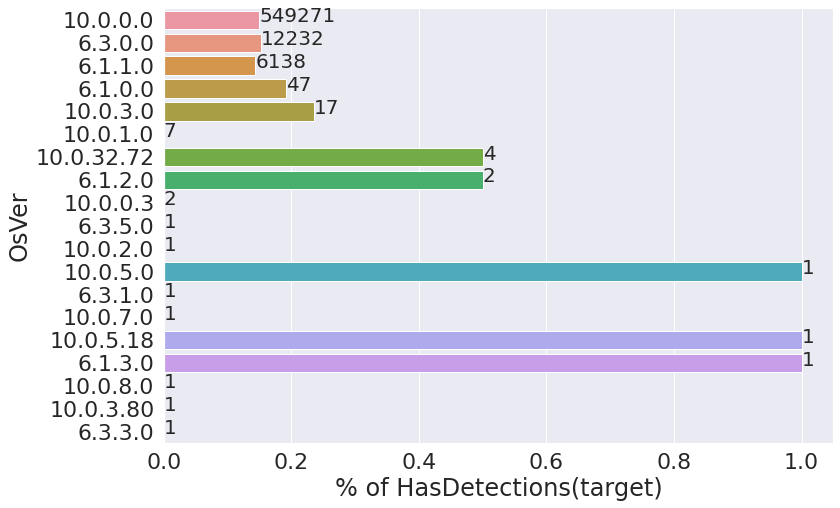

In [39]:
plot_category_percent_of_target(train, 'OsVer')

OsVersion: categories with count lower than 1000 are all grouped together into "other"

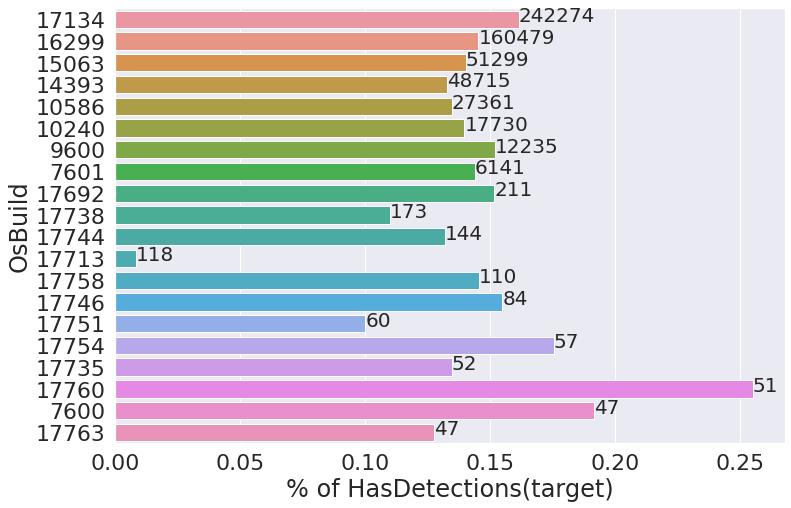

In [40]:
plot_category_percent_of_target(train, 'OsBuild')

In [41]:
train.OsBuild.value_counts().head()

17134    242274
16299    160479
15063     51299
14393     48715
10586     27361
Name: OsBuild, dtype: int64

OsBuild : converted to "Category" type and then categories with count lower than 10,000 are all grouped together into "other". It has no null values

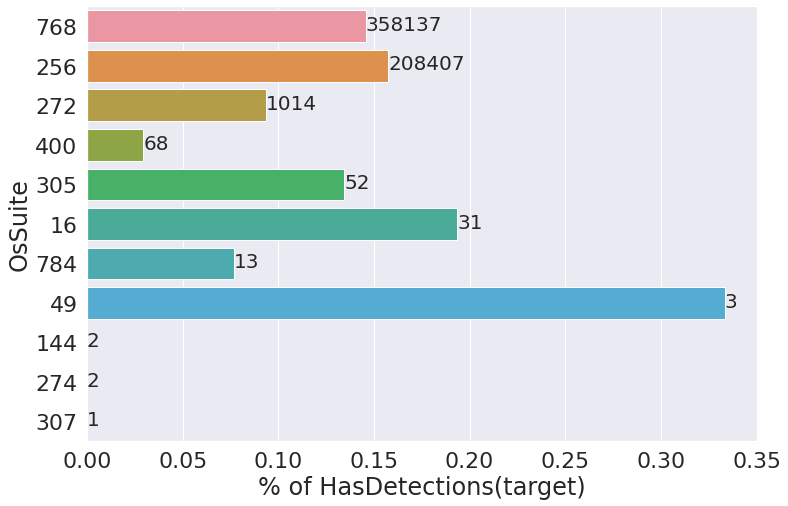

In [42]:
plot_category_percent_of_target(train, 'OsSuite')

OsSuite : converted to "Category" type and then categories with count lower than 10,000 are all grouped together into "other". No null values.

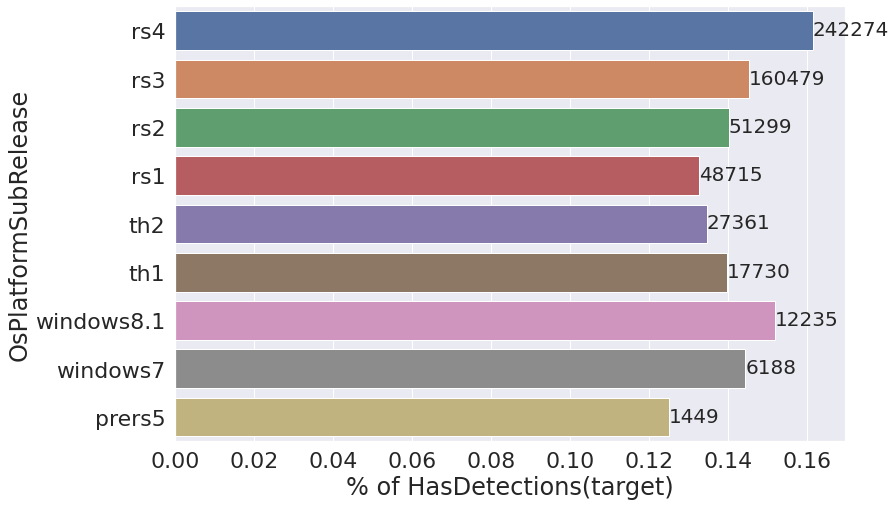

In [43]:
plot_category_percent_of_target(train, 'OsPlatformSubRelease')

No changes needed.

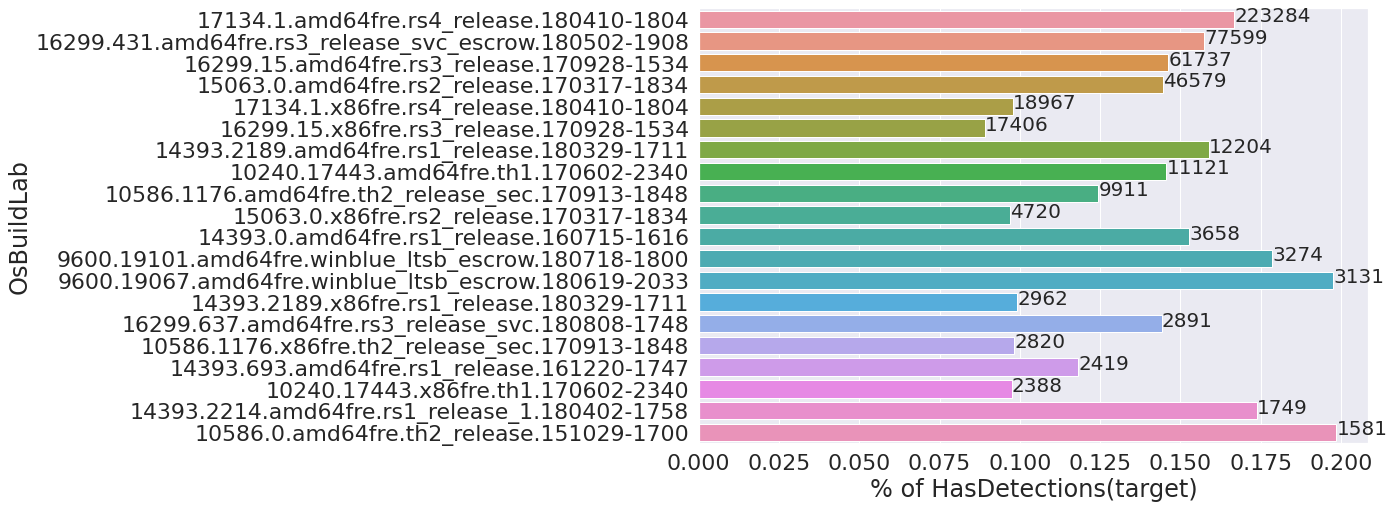

In [44]:
plot_category_percent_of_target(train, 'OsBuildLab')

We can create a new feature by extracting the first and second part of the category name. Categories with count less than 2500 are grouped together into "OTHER" category. It has no null values

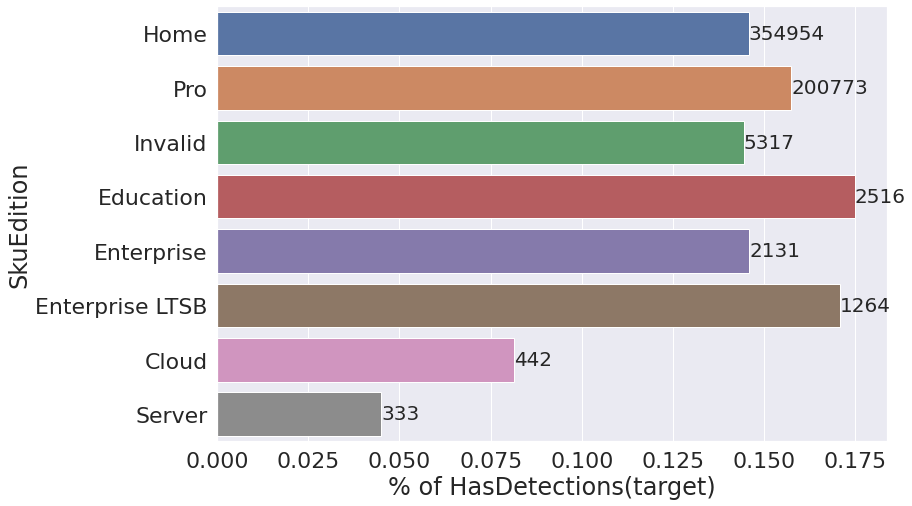

In [45]:
plot_category_percent_of_target(train, 'SkuEdition')

No null values are present. No changes needed

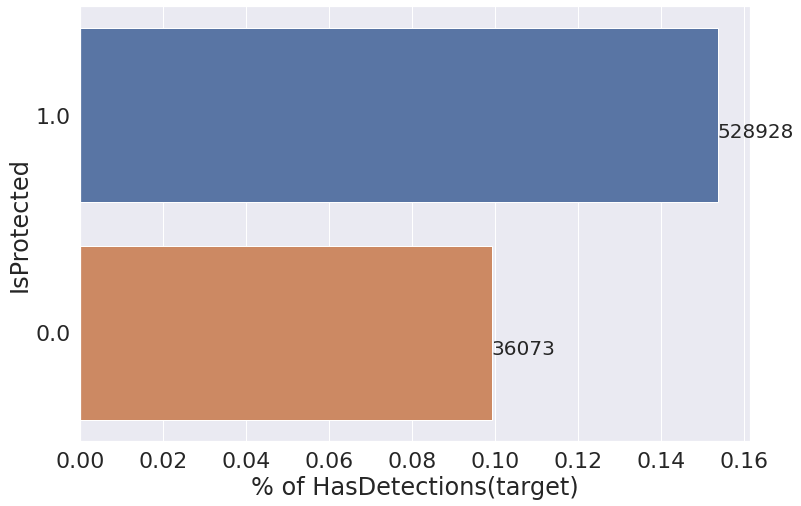

In [46]:
plot_category_percent_of_target(train, 'IsProtected')

We can fill the null values and converted the type to "category"

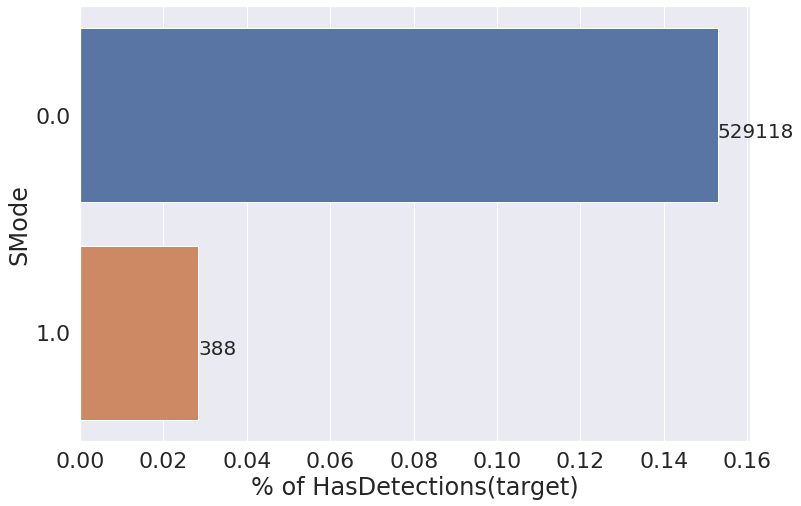

In [47]:
plot_category_percent_of_target(train, 'SMode')

Smode: This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed 

The data is imbalanced but we may keep this since SMode may imply more security and can be important to detect malware

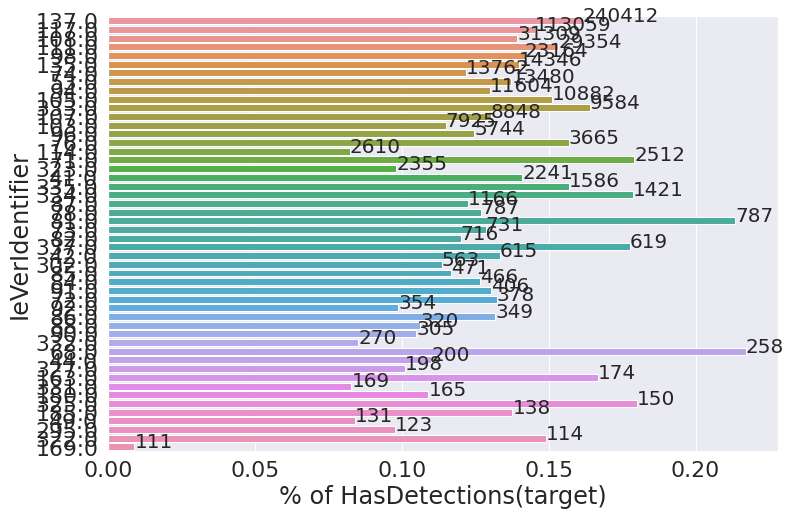

In [48]:
plot_category_percent_of_target(train, 'IeVerIdentifier', 50)

IeVerIdentifier was coverted to category type and categories with count less than 100 were combined in a single category called "OTHER" 

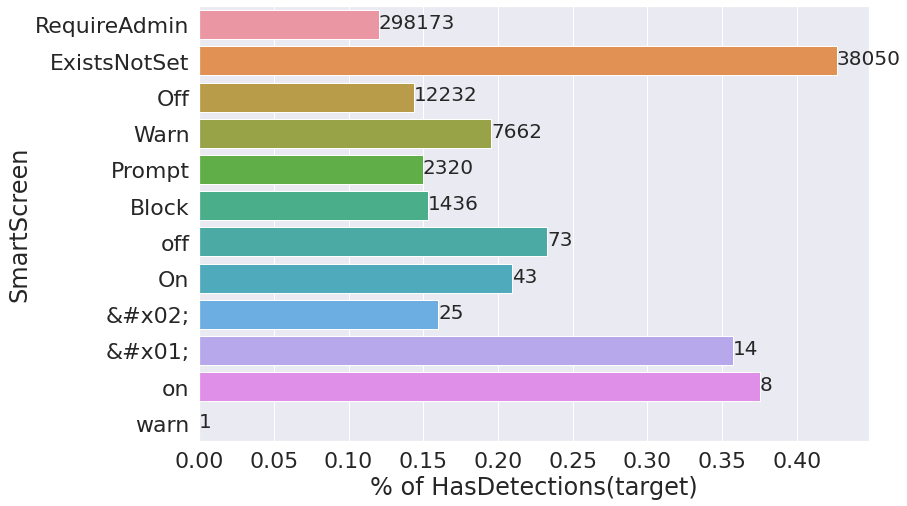

In [49]:
plot_category_percent_of_target(train, 'SmartScreen')

(Off, off), (Warn, warn) , (On, on) can be combined into same category. Categories with count lower than 1000 are grouped together into OTHER

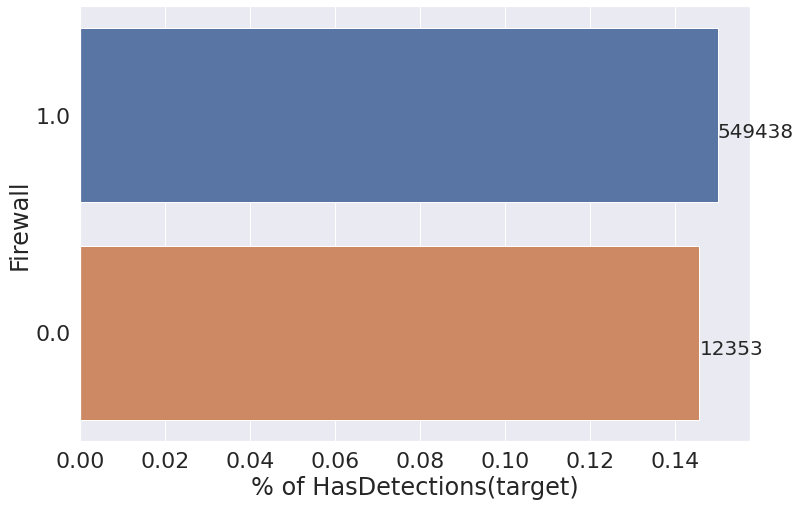

In [50]:
plot_category_percent_of_target(train, 'Firewall')

Even though Firewall is imbalanced, it may help us detect malware as its related to security of the system.

In [51]:
train.UacLuaenable.value_counts()

1.0     563656
0.0       3417
48.0        21
2.0          2
Name: UacLuaenable, dtype: int64

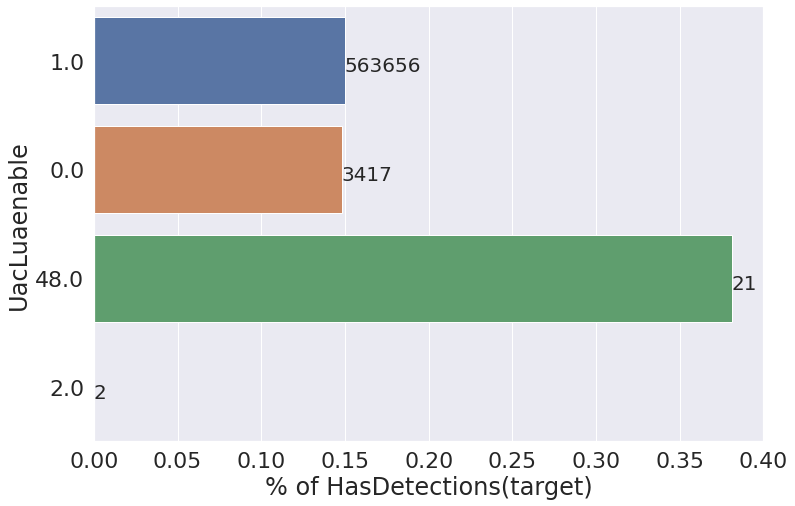

In [52]:
plot_category_percent_of_target(train, 'UacLuaenable')

This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. So we are not dropping it. 48 and 2 can be grouped together into OTHER category.

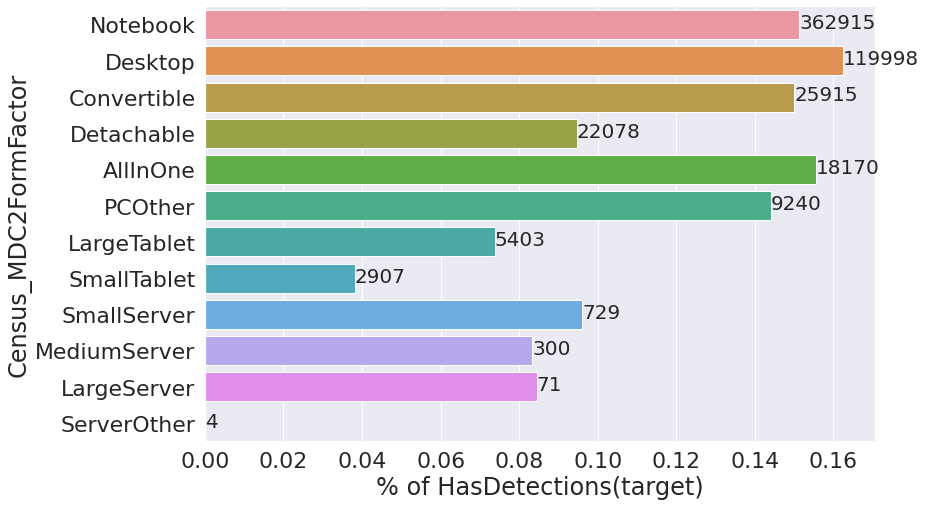

In [53]:
plot_category_percent_of_target(train, 'Census_MDC2FormFactor')

Census_MDC2FormFactor was coverted to category type and categories with count less than 1000 were combined in a single category called "PCOther" 

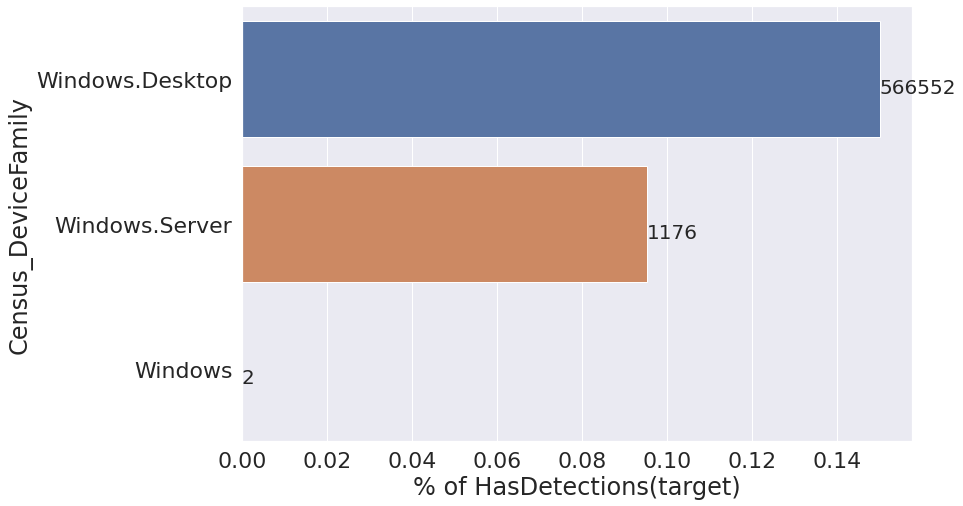

In [54]:
plot_category_percent_of_target(train, 'Census_DeviceFamily')

Here Windows Server and Windows are grouped together since Windows has only two values. 

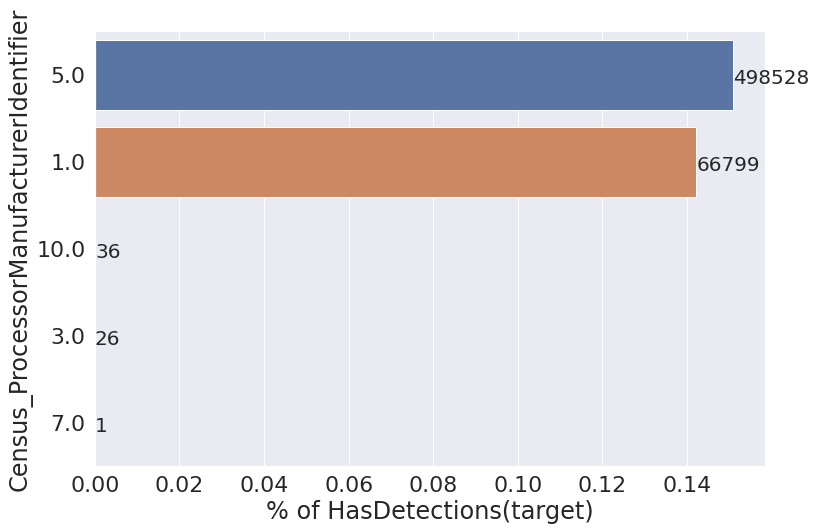

In [55]:
plot_category_percent_of_target(train, 'Census_ProcessorManufacturerIdentifier')

Census_ProcessorManufacturerIdentifier was coverted to category type and categories with count less than 100 were combined in a single category called "Other" 

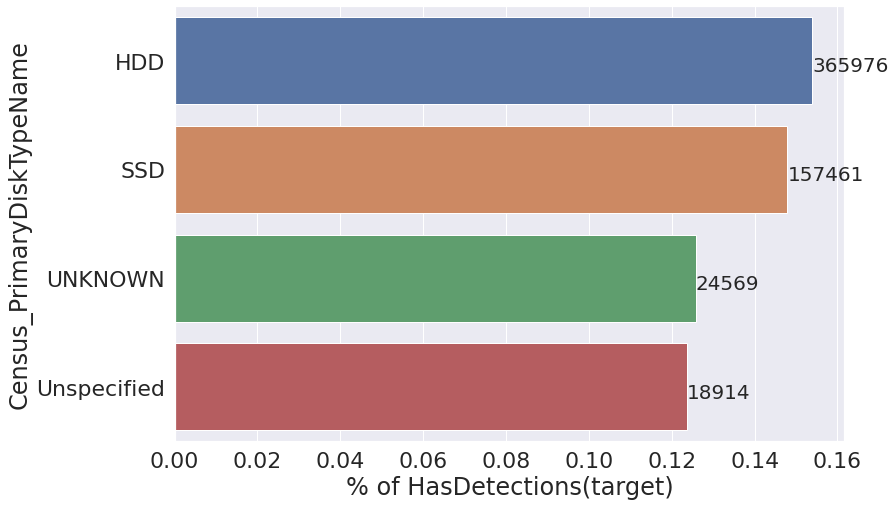

In [56]:
plot_category_percent_of_target(train, 'Census_PrimaryDiskTypeName')

We can combine Unknown, Unspecified and Null values into same category

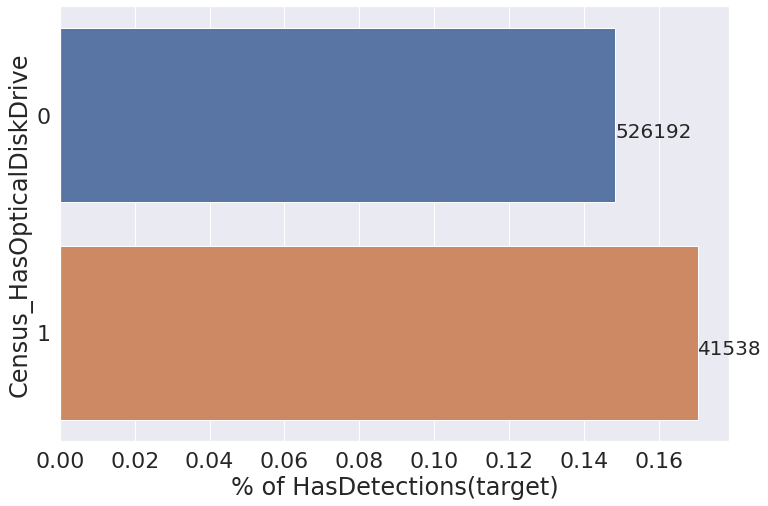

In [57]:
plot_category_percent_of_target(train, 'Census_HasOpticalDiskDrive')

Converted type to Category. No other change needed.

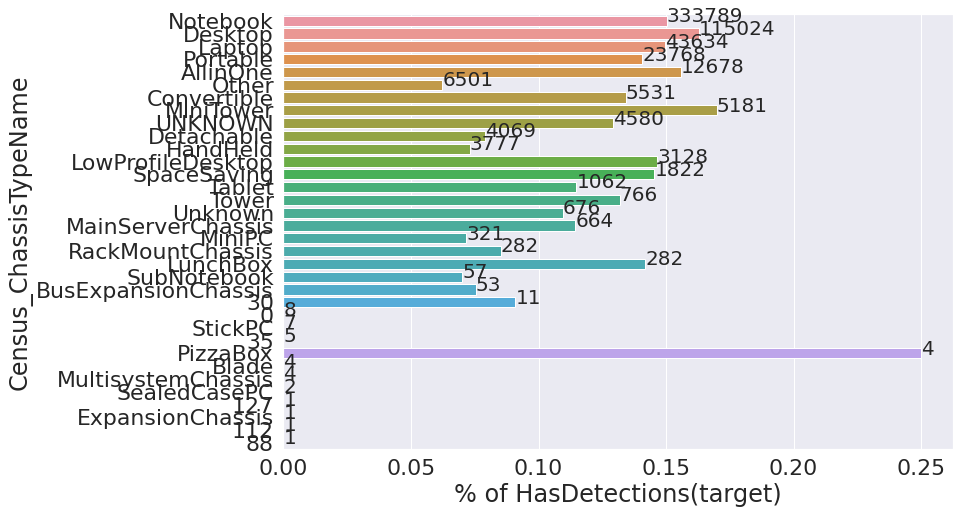

In [58]:
plot_category_percent_of_target(train, 'Census_ChassisTypeName', 52)

(UNKNOWN, Unknown, Null) can be converted into same category. All categories with count less than 100 are grouped together into OTHER

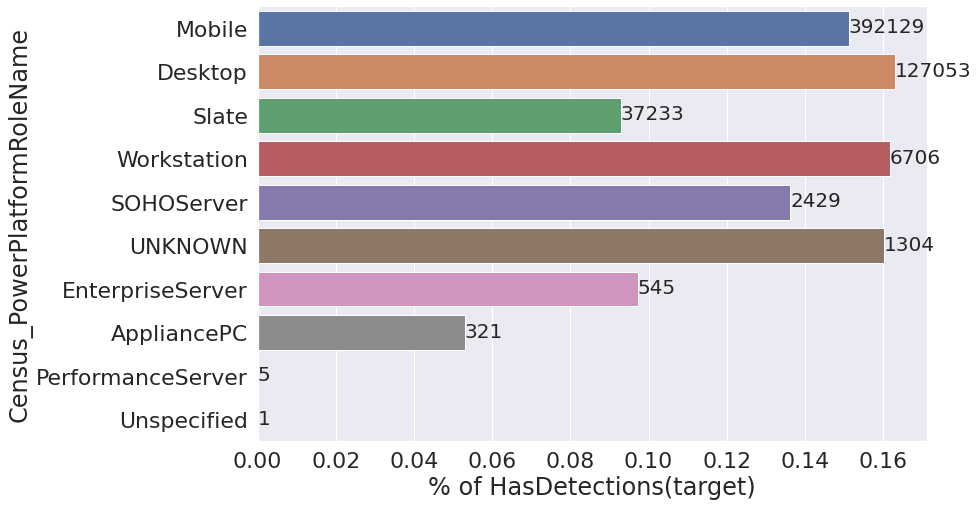

In [59]:
plot_category_percent_of_target(train, 'Census_PowerPlatformRoleName')

Combine UNKNOWN and unspeficied into same category. Null values were filled

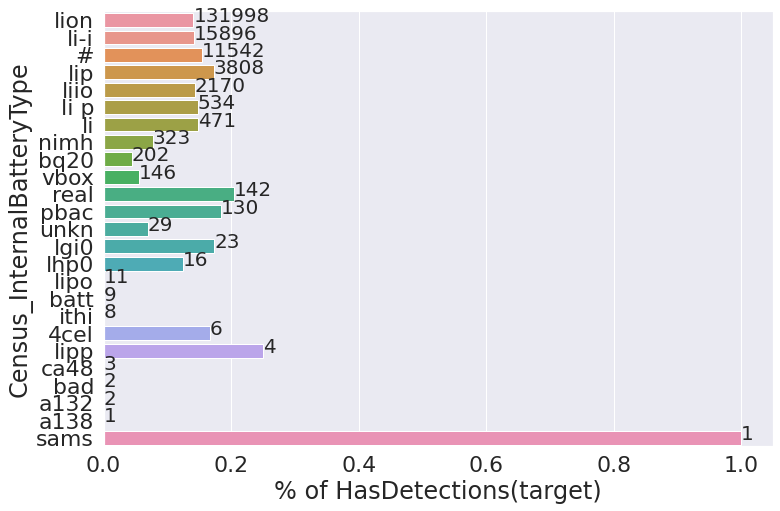

In [60]:
plot_category_percent_of_target(train, 'Census_InternalBatteryType', 25)

Not sure how battery would impact whether a system gets malware or not

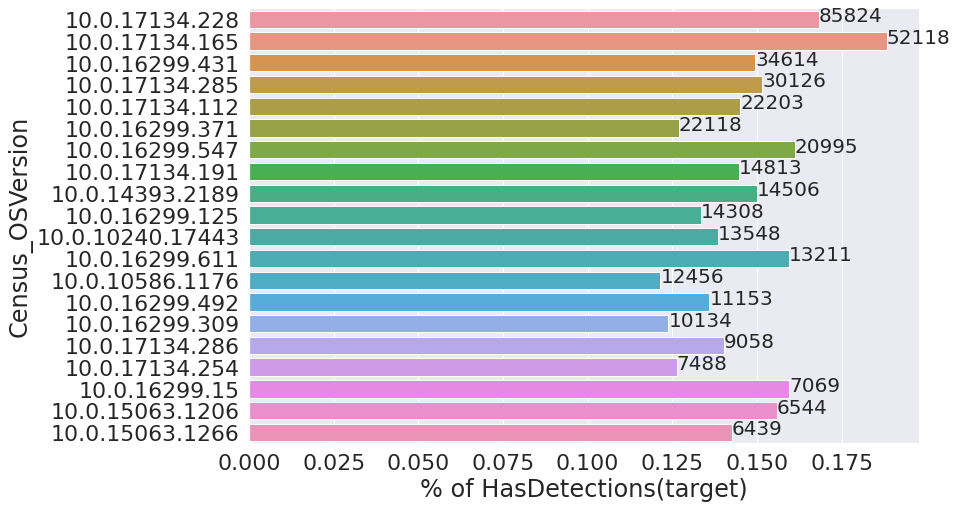

In [61]:
plot_category_percent_of_target(train, 'Census_OSVersion')

We can extract different parts of the string to create new features.

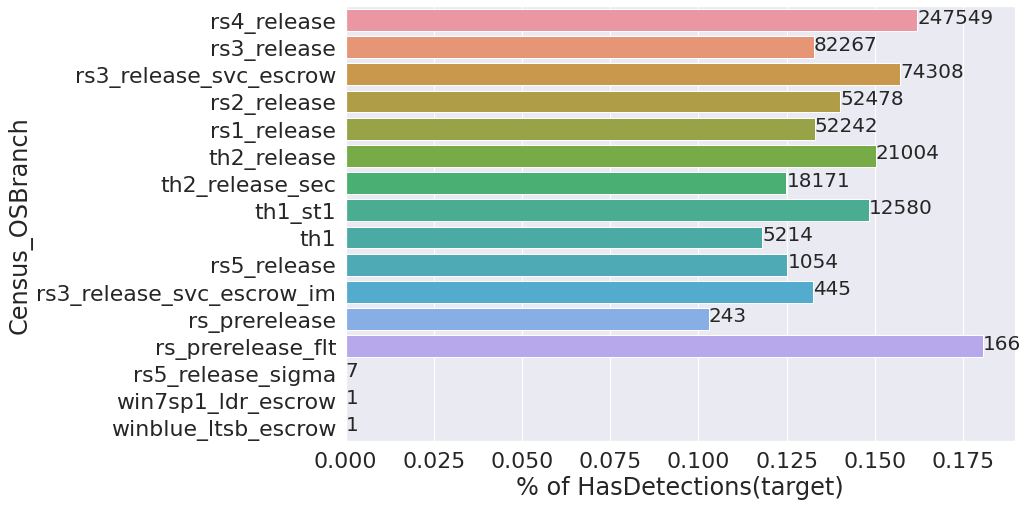

In [62]:
plot_category_percent_of_target(train, 'Census_OSBranch')

This was coverted to category type and categories with count less than 1000 were combined in a single category called "Other" 

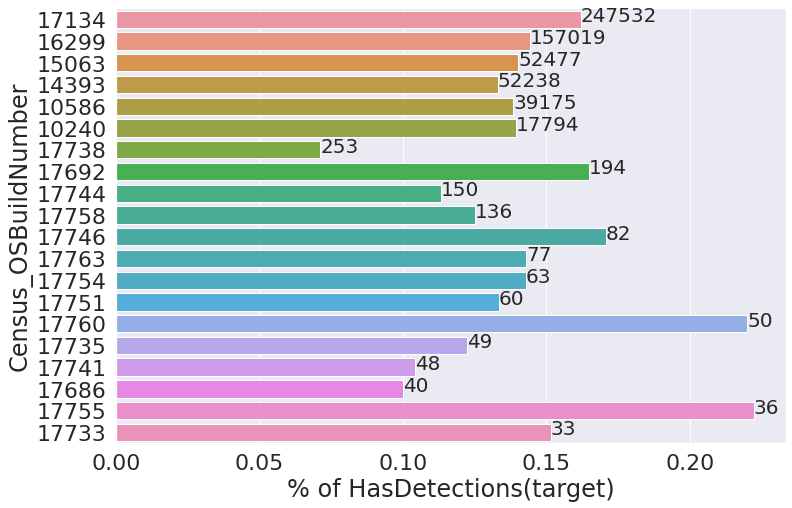

In [63]:
plot_category_percent_of_target(train, 'Census_OSBuildNumber')

This was coverted to category type and categories with count less than 100 were combined in a single category called "Other" 

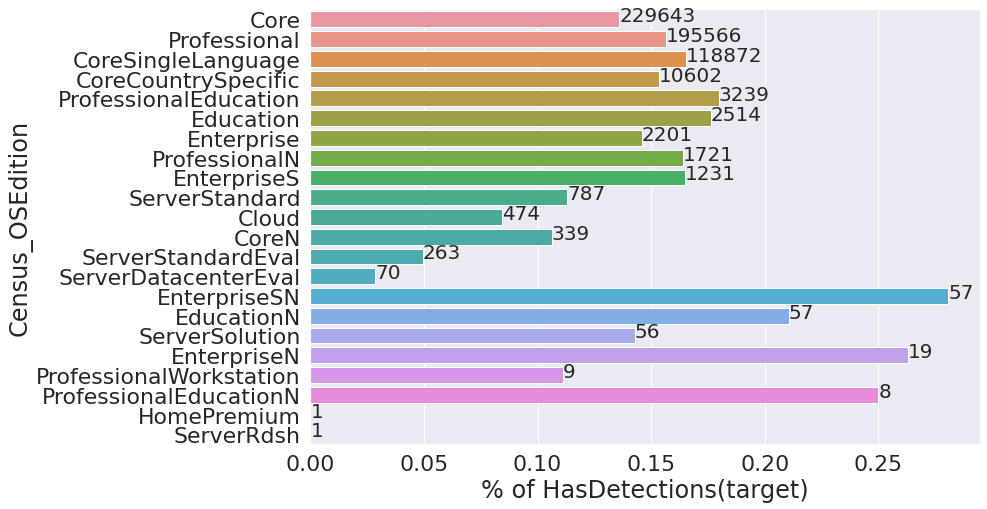

In [64]:
plot_category_percent_of_target(train, 'Census_OSEdition', 30)

We may combine "Core" with other core categories. Same with "professional", "Enterprise","cloud","home" and "server"

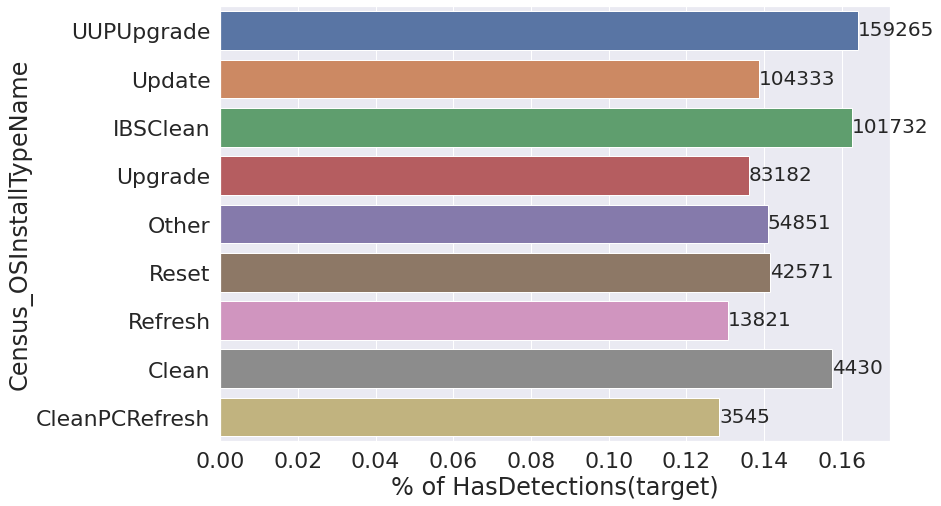

In [65]:
plot_category_percent_of_target(train, "Census_OSInstallTypeName")

No changes needed.

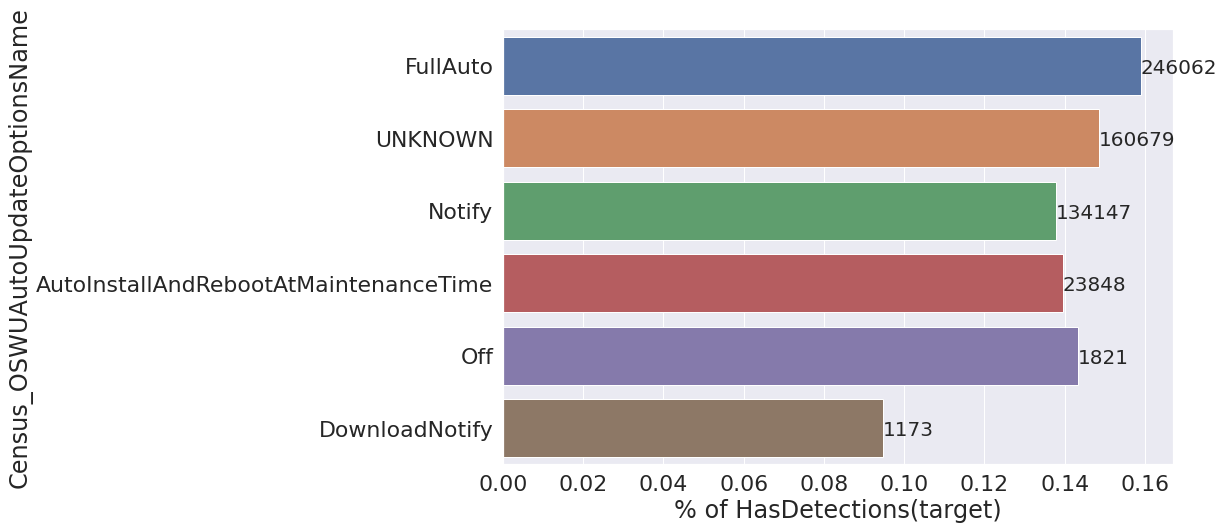

In [66]:
plot_category_percent_of_target(train, 'Census_OSWUAutoUpdateOptionsName')

No changes needed.

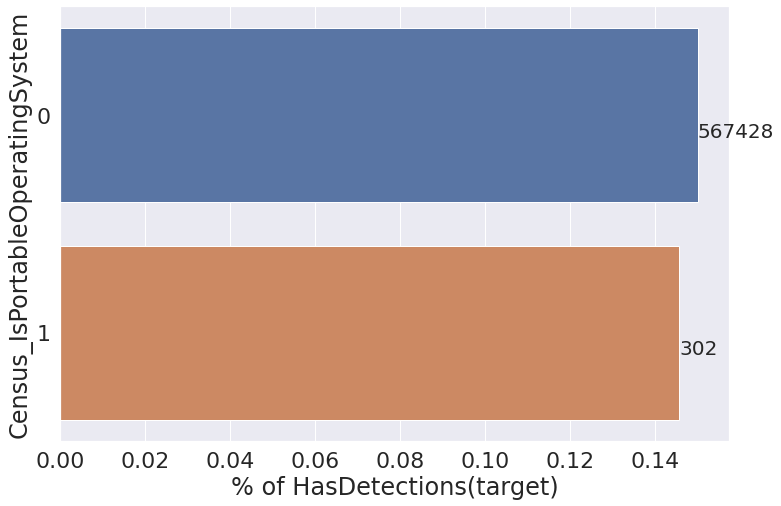

In [67]:
plot_category_percent_of_target(train, 'Census_IsPortableOperatingSystem')

We may remove this later due to the high imbalance of data

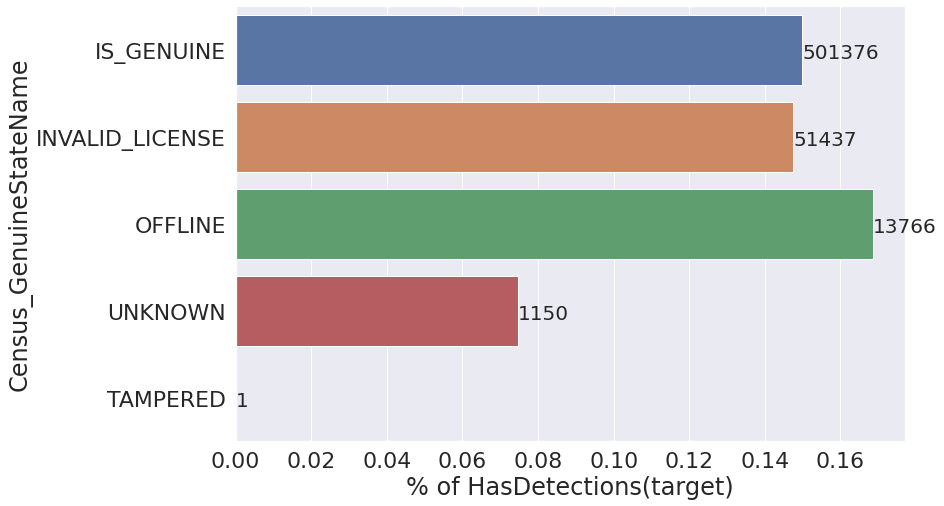

In [68]:
plot_category_percent_of_target(train, 'Census_GenuineStateName')

Combine "OFFLINE", "UNKNOWN" and "TAMPERED" into "OTHER" Category

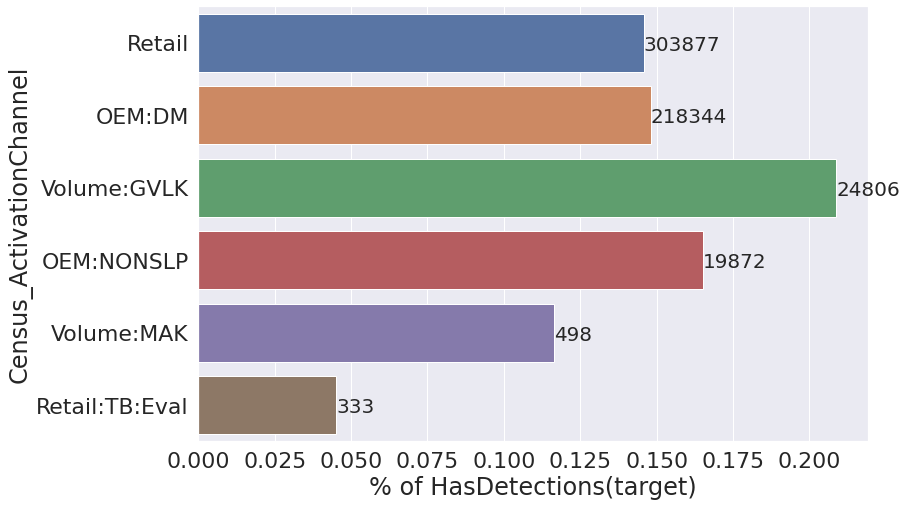

In [69]:
plot_category_percent_of_target(train, 'Census_ActivationChannel')

No changes needed.

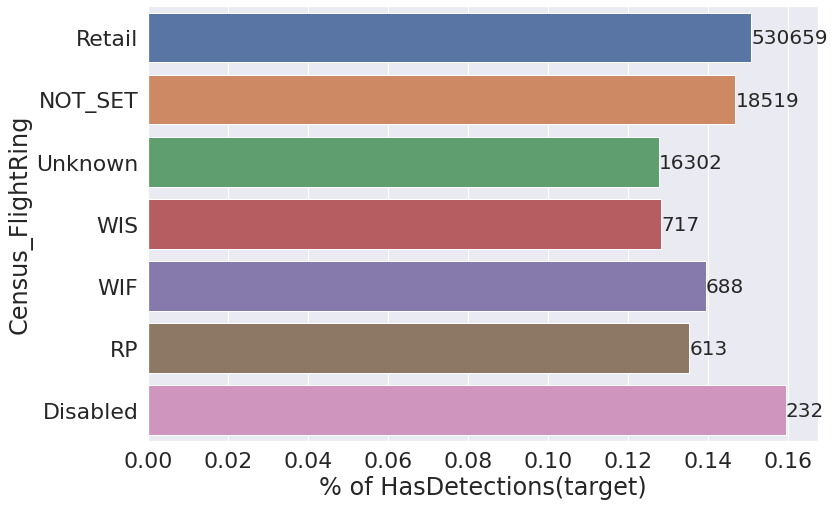

In [70]:
plot_category_percent_of_target(train, 'Census_FlightRing')

This was coverted to category type and categories with count less than 10000 were combined in a single category called "Other" 

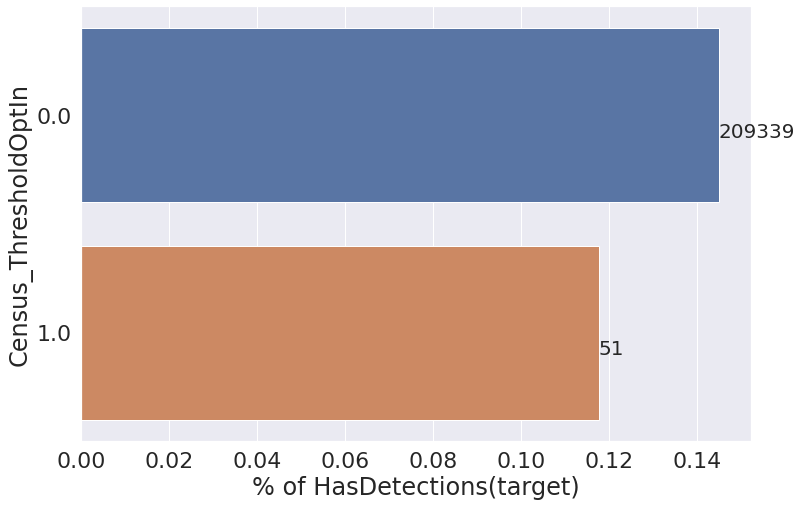

In [71]:
plot_category_percent_of_target(train, 'Census_ThresholdOptIn')

Has high imbalance and should be dropped later.

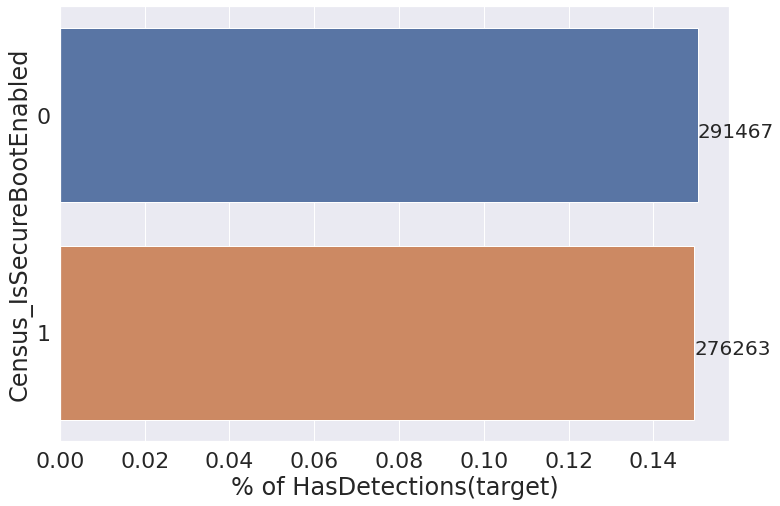

In [72]:
plot_category_percent_of_target(train, 'Census_IsSecureBootEnabled')

No changes needed.

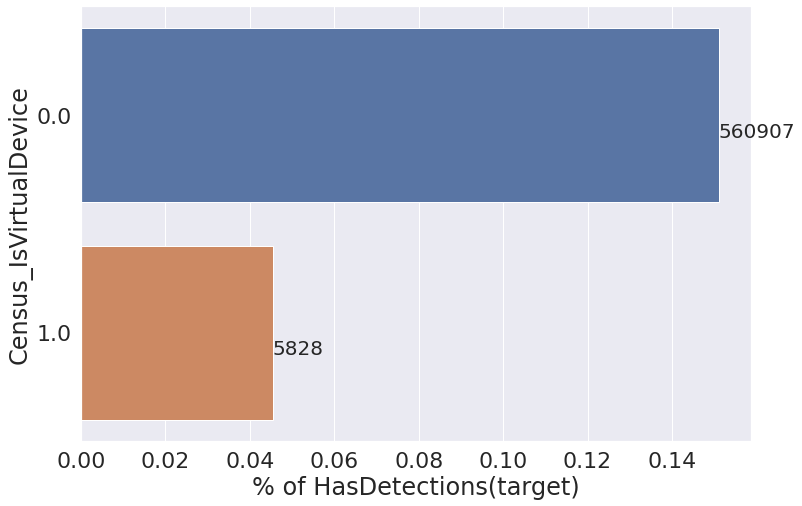

In [73]:
plot_category_percent_of_target(train, 'Census_IsVirtualDevice')

Imbalanced. May delete this later.

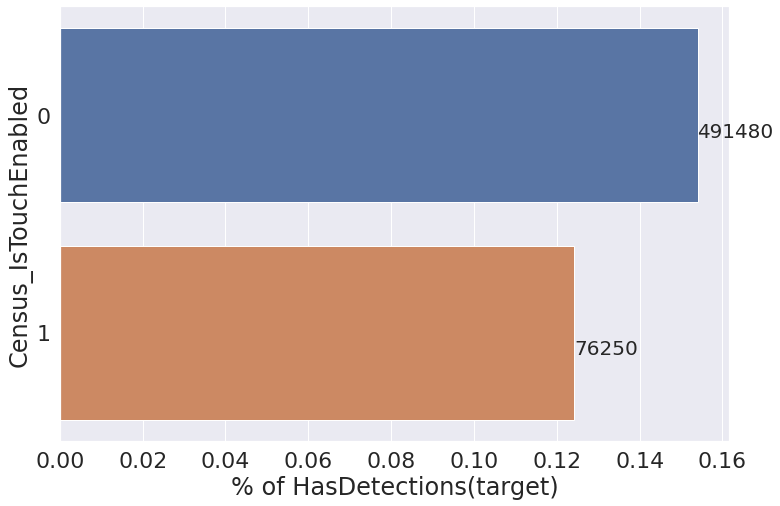

In [74]:
plot_category_percent_of_target(train, 'Census_IsTouchEnabled')

No changes needed.

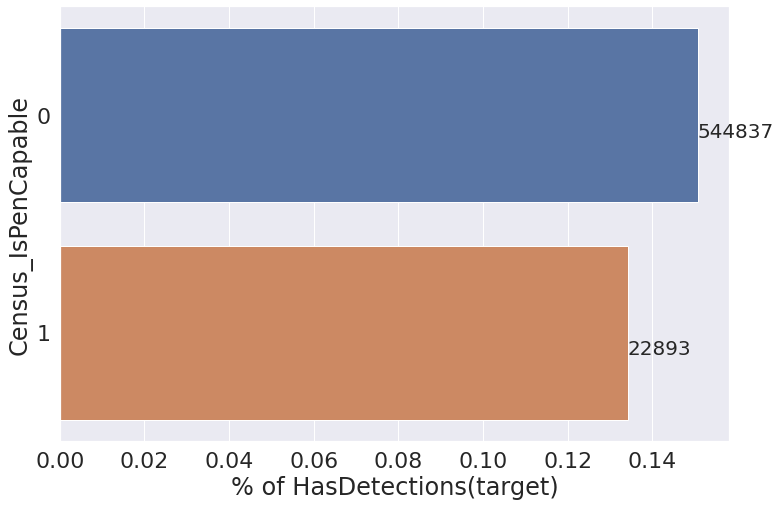

In [75]:
plot_category_percent_of_target(train, 'Census_IsPenCapable')

No changes needed

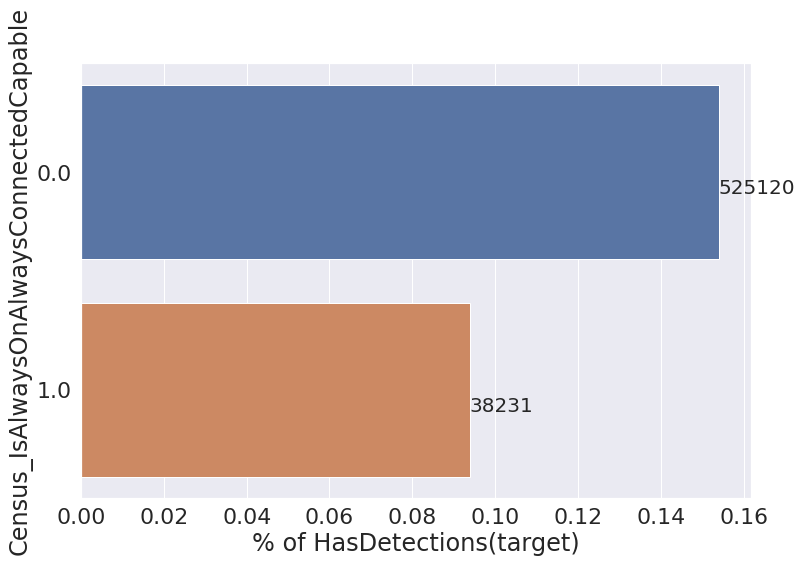

In [76]:
plot_category_percent_of_target(train, 'Census_IsAlwaysOnAlwaysConnectedCapable')

Null values have to be filled. No other changes required. 

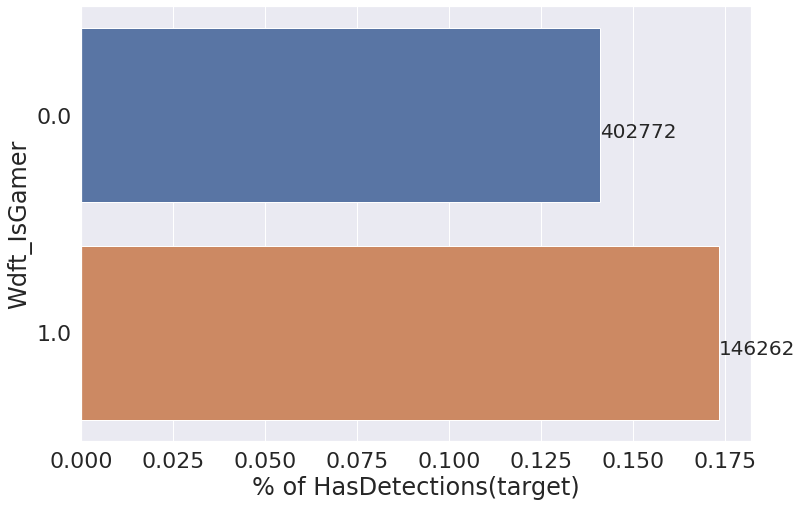

In [77]:
plot_category_percent_of_target(train, 'Wdft_IsGamer')

Null values have to be filled with 1. No other changes required. 

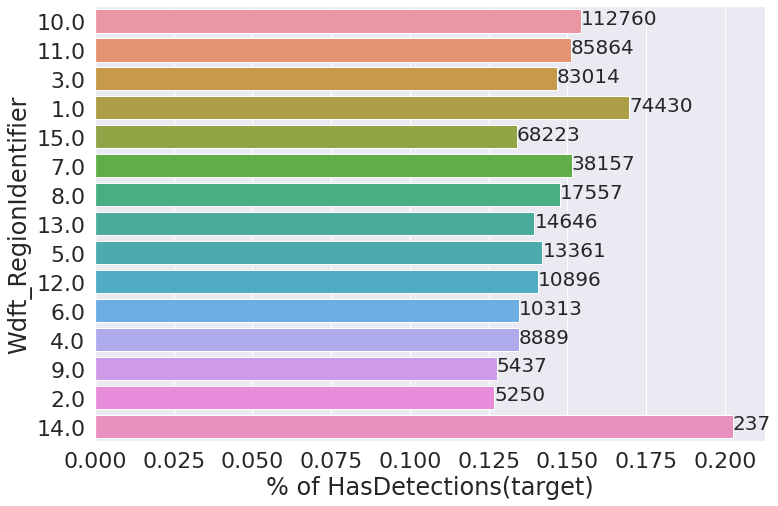

In [78]:
plot_category_percent_of_target(train, 'Wdft_RegionIdentifier')

Convert the dtype into Category

**NOTE: We also need to make sure that all the categorical values present in test dataset are also present in train dataset.**

## Cleaning up train and test dataset

In [79]:
train = train.drop([
            'MachineIdentifier',
            'IsBeta', 
            'CityIdentifier', 
            'AutoSampleOptIn', 
            'PuaMode', 
            'Census_InternalBatteryType', 
            'Census_InternalBatteryNumberOfCharges', 
            'Census_OSArchitecture',
            'Census_OSSkuName',
            'Census_IsFlightsDisabled'], axis=1)

test = test.drop([
            'IsBeta', 
            'CityIdentifier', 
            'AutoSampleOptIn', 
            'PuaMode', 
            'Census_InternalBatteryType', 
            'Census_InternalBatteryNumberOfCharges', 
            'Census_OSArchitecture',
            'Census_OSSkuName',
            'Census_IsFlightsDisabled'], axis=1)

### Combine Categories

As observed in our EDA, there are certain columns where different categories can be combined into one.  So the following function merges those categories together.

In [80]:
def combineCategories(train, test, feature, categoriesToCombine):
    
    numCategories = len(train[feature].cat.categories)

    #We'll just reassign everything to the first category
    firstCategory = categoriesToCombine[0]
    
    for category in categoriesToCombine[1:]:
        train.loc[train[feature] == category, feature] = firstCategory
        test.loc[test[feature] == category, feature] = firstCategory
        
    train[feature] = train[feature].cat.remove_unused_categories();    
    test[feature] = test[feature].cat.remove_unused_categories();

    print("Number of categories before: ", numCategories)
    print("Number of categories after:", len(train[feature].cat.categories))

In [81]:
combineCategories(train, test, 'SmartScreen', ['Off', 'off', 'OFF'])
combineCategories(train, test, 'SmartScreen', ['Warn','warn'])
combineCategories(train, test, 'SmartScreen', ['Prompt','Promt', 'prompt'])
combineCategories(train, test, 'SmartScreen', ['On','on'])
combineCategories(train, test, 'SmartScreen', ['RequireAdmin','requireadmin', 'requireAdmin'])

Number of categories before:  12
Number of categories after: 11
Number of categories before:  11
Number of categories after: 10
Number of categories before:  10
Number of categories after: 10
Number of categories before:  10
Number of categories after: 9
Number of categories before:  9
Number of categories after: 9


In [82]:
combineCategories(train, test, 'Census_PrimaryDiskTypeName', ['UNKNOWN','Unspecified'])

Number of categories before:  4
Number of categories after: 3


In [83]:
combineCategories(train, test, 'Census_PowerPlatformRoleName', ['UNKNOWN', 'Unspecified'])

Number of categories before:  10
Number of categories after: 9


In [84]:
combineCategories(train, test, 'Census_MDC2FormFactor', ["SmallServer", "MediumServer", "LargeServer", "ServerOther"])

Number of categories before:  12
Number of categories after: 9


### Merge Lower count categories

Since most of the columns are imbalanced and have values that are negligible in count, so we are combining them into a single category called "OTHER"

In [86]:
  def replaceLowValueCountsWithOtherCategory(train, test, feature, threshold = 5):
    otherCategory = 'OTHER'

    numCategories = len(train[feature].cat.categories)
    # Add the 'OTHER' category if it doesn't already exist
    if otherCategory not in train[feature].cat.categories:
        train[feature] = train[feature].cat.add_categories(otherCategory)
    if otherCategory not in test[feature].cat.categories:
        test[feature] = test[feature].cat.add_categories(otherCategory)

    # Find all the categories in this feature that don't meet our threshold
    category_selector = train[feature].value_counts() < threshold
    # Assign all the categories that don't meet our threshold to "OTHER"
    train.loc[train[feature].isin((train[feature].value_counts()[category_selector]).index), feature] = otherCategory
    # Remove the unused categories that we grouped into "other" category
    train[feature] = train[feature].cat.remove_unused_categories();

    # Find all missing categores in test set
    missingMask = ~test[feature].cat.categories.isin(train[feature].cat.categories)
    missingCategory = test[feature].cat.categories[missingMask]
    # Assign all missing categories in test set to "OTHER"
    test.loc[test[feature].isin(missingCategory), feature] = otherCategory
    # Remove unused categories    
    test[feature] = test[feature].cat.remove_unused_categories();
    
    #Double check that all of the test features are contained within the training features. 
    assert(test[feature].cat.categories.isin(train[feature].cat.categories).all())
    
    print("Number of categories before: ", numCategories)
    print("Number of categories after:", len(train[feature].cat.categories))

In [87]:
replaceLowValueCountsWithOtherCategory(train, test, 'ProductName', threshold=100)

Number of categories before:  4
Number of categories after: 3


In [88]:
replaceLowValueCountsWithOtherCategory(train, test, 'EngineVersion', threshold=2500)

Number of categories before:  59
Number of categories after: 14


In [89]:
replaceLowValueCountsWithOtherCategory(train, test, 'AppVersion', threshold=2500)

Number of categories before:  91
Number of categories after: 21


In [90]:
replaceLowValueCountsWithOtherCategory(train, test, 'AvSigVersion', threshold=2500)

Number of categories before:  6879
Number of categories after: 17


In [91]:
replaceLowValueCountsWithOtherCategory(train, test, 'AVProductStatesIdentifier', threshold=1000)

Number of categories before:  6687
Number of categories after: 30


In [92]:
replaceLowValueCountsWithOtherCategory(train, test, 'RtpStateBitfield', threshold=3500)

Number of categories before:  7
Number of categories after: 3


In [93]:
replaceLowValueCountsWithOtherCategory(train, test, 'DefaultBrowsersIdentifier', threshold=1000)

Number of categories before:  562
Number of categories after: 8


In [94]:
replaceLowValueCountsWithOtherCategory(train, test, 'AVProductsEnabled', threshold=10000)

Number of categories before:  6
Number of categories after: 3


In [95]:
replaceLowValueCountsWithOtherCategory(train, test, 'OrganizationIdentifier', threshold=1000)

Number of categories before:  45
Number of categories after: 7


In [96]:
replaceLowValueCountsWithOtherCategory(train, test, 'GeoNameIdentifier', threshold=1000)

Number of categories before:  270
Number of categories after: 71


In [97]:
replaceLowValueCountsWithOtherCategory(train, test, 'LocaleEnglishNameIdentifier', threshold=1000)

Number of categories before:  239
Number of categories after: 65


In [98]:
replaceLowValueCountsWithOtherCategory(train, test, 'OsVer', threshold=1000)

Number of categories before:  19
Number of categories after: 4


In [99]:
replaceLowValueCountsWithOtherCategory(train, test, 'OsBuild', threshold=10000)

Number of categories before:  48
Number of categories after: 8


In [100]:
replaceLowValueCountsWithOtherCategory(train, test, 'OsSuite', threshold=10000)

Number of categories before:  11
Number of categories after: 3


In [101]:
replaceLowValueCountsWithOtherCategory(train, test, 'OsBuildLab', threshold=2500)

Number of categories before:  481
Number of categories after: 17


In [102]:
replaceLowValueCountsWithOtherCategory(train, test, 'IeVerIdentifier', threshold=1000)

Number of categories before:  188
Number of categories after: 23


In [103]:
replaceLowValueCountsWithOtherCategory(train, test, 'SmartScreen', threshold=1000)


Number of categories before:  9
Number of categories after: 7


In [104]:
replaceLowValueCountsWithOtherCategory(train, test, 'UacLuaenable', threshold=1000)

Number of categories before:  4
Number of categories after: 3


In [105]:
replaceLowValueCountsWithOtherCategory(train, test, 'Census_OEMNameIdentifier', threshold=1000)

Number of categories before:  1765
Number of categories after: 33


In [106]:
replaceLowValueCountsWithOtherCategory(train, test, 'Census_ProcessorManufacturerIdentifier', threshold=1000)

Number of categories before:  5
Number of categories after: 3


In [107]:
replaceLowValueCountsWithOtherCategory(train, test, 'Census_ProcessorModelIdentifier', threshold=100)

Number of categories before:  2333
Number of categories after: 591


In [108]:
replaceLowValueCountsWithOtherCategory(train, test, 'Census_ChassisTypeName', threshold=100)

Number of categories before:  34
Number of categories after: 21


In [109]:

replaceLowValueCountsWithOtherCategory(train, test, 'Census_OSBranch', threshold=1000)

Number of categories before:  16
Number of categories after: 11


In [110]:
replaceLowValueCountsWithOtherCategory(train, test, 'Census_OSBuildNumber', threshold=1000)

Number of categories before:  62
Number of categories after: 7


In [111]:
replaceLowValueCountsWithOtherCategory(train, test, 'Census_OSBuildRevision', threshold=1000)

Number of categories before:  246
Number of categories after: 73


In [112]:
replaceLowValueCountsWithOtherCategory(train, test, 'Census_OSEdition', threshold=1000)

Number of categories before:  22
Number of categories after: 10


In [113]:

replaceLowValueCountsWithOtherCategory(train, test, 'Census_OSUILocaleIdentifier', threshold=1000)

Number of categories before:  95
Number of categories after: 31


In [114]:
replaceLowValueCountsWithOtherCategory(train, test, 'Census_GenuineStateName', threshold=15000)

Number of categories before:  5
Number of categories after: 3


In [115]:
replaceLowValueCountsWithOtherCategory(train, test, 'Census_FlightRing', threshold=1000)


Number of categories before:  7
Number of categories after: 4


In [116]:
replaceLowValueCountsWithOtherCategory(train, test, 'Census_FirmwareManufacturerIdentifier', threshold=500)

Number of categories before:  339
Number of categories after: 29


In [117]:
replaceLowValueCountsWithOtherCategory(train, test, 'Census_FirmwareVersionIdentifier', threshold=500)

Number of categories before:  25069
Number of categories after: 159


In [118]:
test['Census_MDC2FormFactor'].cat.categories

top_cats = list(train['Census_MDC2FormFactor'].value_counts().index[:5])

train['Census_MDC2FormFactor'] = train['Census_MDC2FormFactor'].astype('category')
test['Census_MDC2FormFactor'] = test['Census_MDC2FormFactor'].astype('category')

train.loc[train['Census_MDC2FormFactor'].isin(top_cats) == False, 'Census_MDC2FormFactor'] = 'PCOther'
test.loc[test['Census_MDC2FormFactor'].isin(top_cats) == False, 'Census_MDC2FormFactor'] = 'PCOther'


In [119]:
replaceLowValueCountsWithOtherCategory(train, test, 'Census_OSVersion', threshold=1000)

Number of categories before:  311
Number of categories after: 75


### Replace Other with 0.0.0.0

We will be extracting features from the categories of the following features, so we are giving it a default value '0.0.0.0' instead of OTHER

In [120]:
def replaceOtherWithDef(df,feature,val):
  categories =np.array(df[feature].unique())
  categories=np.delete(categories,np.argwhere(categories=="OTHER"))
  categories=np.append(categories,val)
  df[feature] = pd.Categorical(df[feature], categories=categories)
  df[feature] =df[feature].fillna(val)
  return df

In [123]:
train=replaceOtherWithDef(train,"OsBuildLab","0.0.0.0")
test=replaceOtherWithDef(test,"OsBuildLab","0.0.0.0")

train=replaceOtherWithDef(train,"EngineVersion","0.0.0.0")
test=replaceOtherWithDef(test,"EngineVersion","0.0.0.0")

train=replaceOtherWithDef(train,"AppVersion","0.0.0.0")
test=replaceOtherWithDef(test,"AppVersion","0.0.0.0")

train=replaceOtherWithDef(train,"AvSigVersion","0.0.0.0")
test=replaceOtherWithDef(test,"AvSigVersion","0.0.0.0")

train=replaceOtherWithDef(train,"Census_OSVersion","0.0.0.0")
test=replaceOtherWithDef(test,"Census_OSVersion","0.0.0.0")



### Fill null values

In [124]:
#replaceLowValueCountsWithOtherCategory(train, test, 'AVProductsInstalled', threshold=10000)
train['AVProductsInstalled'] = train['AVProductsInstalled'].fillna(0)
test['AVProductsInstalled'] = test['AVProductsInstalled'].fillna(0)

In [125]:
train['Census_TotalPhysicalRAM'] = np.log(train['Census_TotalPhysicalRAM'])
train.loc[train['Census_PrimaryDiskTotalCapacity'] == 0, 'Census_PrimaryDiskTotalCapacity'] = np.nan
train['Census_PrimaryDiskTotalCapacity'] = np.log(train['Census_PrimaryDiskTotalCapacity'])
train.loc[train['Census_SystemVolumeTotalCapacity'] == 0, 'Census_SystemVolumeTotalCapacity'] = np.nan
train['Census_SystemVolumeTotalCapacity'] = np.log(train['Census_SystemVolumeTotalCapacity'])

In [126]:
test['Census_TotalPhysicalRAM'] = np.log(test['Census_TotalPhysicalRAM'])
test.loc[test['Census_PrimaryDiskTotalCapacity'] == 0, 'Census_PrimaryDiskTotalCapacity'] = np.nan
test['Census_PrimaryDiskTotalCapacity'] = np.log(test['Census_PrimaryDiskTotalCapacity'])
test.loc[test['Census_SystemVolumeTotalCapacity'] == 0, 'Census_SystemVolumeTotalCapacity'] = np.nan
test['Census_SystemVolumeTotalCapacity'] = np.log(test['Census_SystemVolumeTotalCapacity'])

In [128]:
train.Census_OEMModelIdentifier.value_counts(normalize=True, dropna=False).cumsum().head(40)
train['Census_OEMModelIdentifier'] = train['Census_OEMModelIdentifier'].fillna(0)
test['Census_OEMModelIdentifier'] = test['Census_OEMModelIdentifier'].fillna(0)
# Find max... Set NaN values as the max+1 value

In [129]:
def convertProcessor(df):
  pcount = list(df['Census_ProcessorCoreCount'])
  prange = np.array([1,2,4,8,16,32])

  for i in range(len(pcount)):
    pr = np.absolute(prange - pcount[i])
    indexmin = np.argmin(pr)
    pcount[i] = prange[indexmin]
  
  df['Census_ProcessorCoreCount'] = pcount

In [130]:
convertProcessor(train)
convertProcessor(test)

In [131]:
train.Census_PrimaryDiskTotalCapacity.value_counts(normalize=True, dropna=False).cumsum().head(40)
mean_Census_PrimaryDiskTotalCapacity=train.Census_PrimaryDiskTotalCapacity.mean()
train['Census_PrimaryDiskTotalCapacity'] = train['Census_PrimaryDiskTotalCapacity'].fillna(mean_Census_PrimaryDiskTotalCapacity)
test['Census_PrimaryDiskTotalCapacity'] = test['Census_PrimaryDiskTotalCapacity'].fillna(mean_Census_PrimaryDiskTotalCapacity)
# Find mean... Set NaN values as the mean value

In [132]:
train.Census_SystemVolumeTotalCapacity.value_counts(normalize=True, dropna=False).cumsum().head(40)
mean_Census_SystemVolumeTotalCapacity=train.Census_SystemVolumeTotalCapacity.mean()
train['Census_SystemVolumeTotalCapacity'] = train['Census_SystemVolumeTotalCapacity'].fillna(mean_Census_SystemVolumeTotalCapacity)
test['Census_SystemVolumeTotalCapacity'] = test['Census_SystemVolumeTotalCapacity'].fillna(mean_Census_SystemVolumeTotalCapacity)
# Find mean... Set NaN values as the mean value

In [133]:
def convertRamsizes(df):
  pcount = list(df['Census_TotalPhysicalRAM'])
  prange = np.array([512,1024,2048,4096,8192,16*1024,32*1024,65536])

  for i in range(len(pcount)):
    pr = np.absolute(prange - pcount[i])
    indexmin = np.argmin(pr)
    pcount[i] = prange[indexmin]
  
  df['Census_TotalPhysicalRAM'] = pcount

In [134]:
convertRamsizes(train)
convertRamsizes(test)

In [135]:
train.Census_InternalPrimaryDiagonalDisplaySizeInInches.value_counts(normalize=True, dropna=False).cumsum().head(40)
mean_IPDDSII=train.Census_InternalPrimaryDiagonalDisplaySizeInInches.mean()
train['Census_InternalPrimaryDiagonalDisplaySizeInInches'] = train['Census_InternalPrimaryDiagonalDisplaySizeInInches'].fillna(mean_IPDDSII)
test['Census_InternalPrimaryDiagonalDisplaySizeInInches'] = test['Census_InternalPrimaryDiagonalDisplaySizeInInches'].fillna(mean_IPDDSII)
# Find mean... Set NaN values as the mean value

In [136]:
def convertResolution(df):
  pcount = list(df['Census_InternalPrimaryDisplayResolutionHorizontal'])
  prange = np.array([1024,1280,1366,1440,1600,1920,2560,3440])

  for i in range(len(pcount)):
    pr = np.absolute(prange - pcount[i])
    indexmin = np.argmin(pr)
    pcount[i] = prange[indexmin]
  
  df['Census_InternalPrimaryDisplayResolutionHorizontal'] = pcount

In [137]:
convertResolution(train)
convertResolution(test)

In [138]:
def convertResolutionV(df):
  pcount = list(df['Census_InternalPrimaryDisplayResolutionVertical'])
  prange = np.array([540,768,900,1080,1200,1440,2048])

  for i in range(len(pcount)):
    pr = np.absolute(prange - pcount[i])
    indexmin = np.argmin(pr)
    pcount[i] = prange[indexmin]
  
  df['Census_InternalPrimaryDisplayResolutionVertical'] = pcount

In [139]:
convertResolutionV(train)
convertResolutionV(test)

### Feature Engineering

We have referred different forums and public notebooks to engineer more features. 

In [140]:
def extract_data(data):   
    data['OsBuildLab_exact'] = data['OsBuildLab'].apply(lambda x: x.split('.')[0] +'.'+ x.split('.')[1])
    data['OsBuildLab_exact'] = data['OsBuildLab_exact'].astype('category')
    
    data['EngineVersion_2'] = data['EngineVersion'].apply(lambda x: x.split('.')[2]).astype('category')
    data['EngineVersion_3'] = data['EngineVersion'].apply(lambda x: x.split('.')[3]).astype('category')
    
    data['AppVersion_1'] = data['AppVersion'].apply(lambda x: x.split('.')[1]).astype('category')
    data['AppVersion_2'] = data['AppVersion'].apply(lambda x: x.split('.')[2]).astype('category')
    data['AppVersion_3'] = data['AppVersion'].apply(lambda x: x.split('.')[3]).astype('category')
    
    data['AvSigVersion_0'] = data['AvSigVersion'].apply(lambda x: x.split('.')[0]).astype('category')
    data['AvSigVersion_1'] = data['AvSigVersion'].apply(lambda x: x.split('.')[1]).astype('category')
    data['AvSigVersion_2'] = data['AvSigVersion'].apply(lambda x: x.split('.')[2]).astype('category')
    
    data['OsBuildLab_0'] = data['OsBuildLab'].apply(lambda x: x.split('.')[0]).astype('category')
    data['OsBuildLab_1'] = data['OsBuildLab'].apply(lambda x: x.split('.')[1]).astype('category')
    data['OsBuildLab_2'] = data['OsBuildLab'].apply(lambda x: x.split('.')[2]).astype('category')
    data['OsBuildLab_3'] = data['OsBuildLab'].apply(lambda x: x.split('.')[3]).astype('category')
    
    data['Census_OSVersion_0'] = data['Census_OSVersion'].apply(lambda x: x.split('.')[0]).astype('category')
    data['Census_OSVersion_1'] = data['Census_OSVersion'].apply(lambda x: x.split('.')[1]).astype('category')
    data['Census_OSVersion_2'] = data['Census_OSVersion'].apply(lambda x: x.split('.')[2]).astype('category')
    data['Census_OSVersion_3'] = data['Census_OSVersion'].apply(lambda x: x.split('.')[3]).astype('category')
    return data

In [141]:
def featureEngineering(df):
    df = extract_data(df)
    #Mine
    df['HighRam'] = df['Census_TotalPhysicalRAM'] > 16384
    df['LowSystemDisk'] = df['Census_SystemVolumeTotalCapacity'] > 30000.0
    df['LowDisk'] = df['Census_PrimaryDiskTotalCapacity'] > 16384
    #From Kaggle
    df['primary_drive_c_ratio'] = df['Census_SystemVolumeTotalCapacity']/ df['Census_PrimaryDiskTotalCapacity']
    df['non_primary_drive_MB'] = df['Census_PrimaryDiskTotalCapacity'] - df['Census_SystemVolumeTotalCapacity']
    df['aspect_ratio'] = df['Census_InternalPrimaryDisplayResolutionHorizontal']/ df['Census_InternalPrimaryDisplayResolutionVertical']
    df['dpi'] = ((df['Census_InternalPrimaryDisplayResolutionHorizontal']**2 + df['Census_InternalPrimaryDisplayResolutionVertical']**2)**.5)/(df['Census_InternalPrimaryDiagonalDisplaySizeInInches'])
    df['dpi_square'] = df['dpi'] ** 2
    df['MegaPixels'] = (df['Census_InternalPrimaryDisplayResolutionHorizontal'] * df['Census_InternalPrimaryDisplayResolutionVertical'])/1e6
    df['Screen_Area'] = (df['aspect_ratio']* (df['Census_InternalPrimaryDiagonalDisplaySizeInInches']**2))/(df['aspect_ratio']**2 + 1)
    df['ram_per_processor'] = df['Census_TotalPhysicalRAM']/ df['Census_ProcessorCoreCount']
    df['new_num_0'] = df['Census_InternalPrimaryDiagonalDisplaySizeInInches'] / df['Census_ProcessorCoreCount']
    df['new_num_1'] = df['Census_ProcessorCoreCount'] * df['Census_InternalPrimaryDiagonalDisplaySizeInInches']
    
    return df

In [142]:
train = featureEngineering(train)
test = featureEngineering(test)

In [143]:
train.head(5)

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,OsBuildLab_exact,EngineVersion_2,EngineVersion_3,AppVersion_1,AppVersion_2,AppVersion_3,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,HighRam,LowSystemDisk,LowDisk,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,dpi,dpi_square,MegaPixels,Screen_Area,ram_per_processor,new_num_0,new_num_1
0,win8defender,1.1.14800.3,4.14.17613.18039,0.0.0.0,0.0,1,NaN,OTHER,3.0,2.0,1,164,27.0,89.0,88,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0.0,117.0,RequireAdmin,0.0,1.0,Convertible,Windows.Desktop,1443.0,331891.0,4,5.0,2569.0,NaN,11.712628,SSD,11.546883,0,512,Portable,12.5,1920,1080,Mobile,10.0.16299.371,rs3_release,16299,371,Core,Upgrade,14.0,49,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,0.0,355.0,19951.0,1,0.0,0.0,1,0,0.0,0.0,15.0,0,16299.15,14800,3,14,17613,18039,0,0,0,16299,15,amd64fre,rs3_release,10,0,16299,371,False,False,False,0.985849,0.165746,1.777778,176.232574,31057.920000,2.073600,66.765579,128.0,3.125,50.000000
1,win8defender,1.1.14500.5,4.10.14393.0,0.0.0.0,7.0,0,NaN,53447.0,1.0,1.0,1,94,27.0,224.0,16,windows10,x64,10.0.0.0,14393,768,rs1,0.0.0.0,Home,1.0,NaN,94.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,530.0,257633.0,4,5.0,2459.0,NaN,12.628870,HDD,12.627224,0,512,Notebook,15.5,1366,768,Mobile,10.0.14393.693,rs1_release,14393,693,Core,IBSClean,1.0,5,UNKNOWN,0,IS_GENUINE,Retail,NaN,Retail,NaN,142.0,OTHER,0,NaN,0.0,0,0,0.0,0.0,11.0,0,0.0,14500,5,10,14393,0,0,0,0,0,0,0,0,10,0,14393,693,False,False,False,0.999870,0.001646,1.778646,101.102765,10221.768991,1.049088,102.632724,128.0,3.875,62.000000
2,win8defender,1.1.15200.1,4.18.1807.18075,0.0.0.0,7.0,0,NaN,53447.0,1.0,1.0,1,35,27.0,277.0,75,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,88439.0,4,5.0,2668.0,NaN,13.075146,HDD,13.072465,0,512,Notebook,14.0,1366,768,Mobile,10.0.17134.228,rs4_release,17134,228,Professional,Reset,8.0,31,FullAuto,0,IS_GENUINE,OEM:DM,NaN,Retail,NaN,628.0,OTHER,0,NaN,0.0,0,0,0.0,0.0,4.0,0,17134.1,15200,1,18,1807,18075,0,0,0,17134,1,amd64fre,rs4_release,10,0,17134,228,False,False,False,0.999795,0.002681,1.778646,111.935204,12529.489796,1.049088,83.729507,128.0,3.500,56.000000
3,win8defender,1.1.15200.1,4.8.

### Encoding

We performed frequency encoding, followed by label encoding for these categorical columns

In [ ]:
cols = train.columns
num_cols = train._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [145]:
to_encode = []
for col in cat_cols:
    if train[col].nunique() > 1000:
        print(col, train[col].nunique())
        to_encode.append(col)

In [146]:
def frequency_encoding(variable):
    t = pd.concat([train[variable], test[variable]]).value_counts().reset_index()
    t = t.reset_index()
    t.loc[t[variable] == 1, 'level_0'] = np.nan
    t.set_index('index', inplace=True)
    max_label = t['level_0'].max() + 1
    t.fillna(max_label, inplace=True)    
    return t.to_dict()['level_0']

In [147]:
for col in to_encode:
    freq_enc_dict = frequency_encoding(col)
    train[col] = train[col].apply(lambda x: freq_enc_dict.get(x, np.nan))
    test[col] = test[col].apply(lambda x: freq_enc_dict.get(x, np.nan))
    cat_cols.remove(col)

In [ ]:
indexer = {}
for col in cat_cols:
    _, indexer[col] = pd.factorize(train[col].astype(str), sort=True)

In [149]:
for col in cat_cols:
    # Label encoding --> Assigning a unique index
    train[col] = indexer[col].get_indexer(train[col].astype(str))
    test[col] = indexer[col].get_indexer(test[col].astype(str))

In [151]:
train.columns

Index(['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'RtpStateBitfield', 'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       ...
       'primary_drive_c_ratio', 'non_primary_drive_MB', 'aspect_ratio', 'dpi',
       'dpi_square', 'MegaPixels', 'Screen_Area', 'ram_per_processor',
       'new_num_0', 'new_num_1'],
      dtype='object', length=103)

In [152]:
x_columns = ['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'RtpStateBitfield', 'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'SMode', 'IeVerIdentifier',
       'SmartScreen', 'Firewall', 'UacLuaenable', 'Census_MDC2FormFactor',
       'Census_DeviceFamily', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM', 'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_PowerPlatformRoleName', 'Census_OSVersion', 'Census_OSBranch',
       'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSEdition',
       'Census_OSInstallTypeName', 'Census_OSInstallLanguageIdentifier',
       'Census_OSUILocaleIdentifier', 'Census_OSWUAutoUpdateOptionsName',
       'Census_IsPortableOperatingSystem', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_IsFlightingInternal',
       'Census_FlightRing', 'Census_ThresholdOptIn',
       'Census_FirmwareManufacturerIdentifier',
       'Census_FirmwareVersionIdentifier', 'Census_IsSecureBootEnabled',
       'Census_IsWIMBootEnabled', 'Census_IsVirtualDevice',
       'Census_IsTouchEnabled', 'Census_IsPenCapable',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer',
       'Wdft_RegionIdentifier', 'HighRam', 'LowSystemDisk',
       'LowDisk', 'primary_drive_c_ratio', 'non_primary_drive_MB',
       'aspect_ratio', 'dpi', 'dpi_square', 'MegaPixels', 'Screen_Area',
       'ram_per_processor', 'new_num_0', 'new_num_1']

In [153]:
test_x = test[x_columns]

In [154]:
data_x = train[x_columns]
data_y = train['HasDetections']

In [155]:
trainforindex=train[x_columns]

In [156]:
train.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,OsBuildLab_exact,EngineVersion_2,EngineVersion_3,AppVersion_1,AppVersion_2,AppVersion_3,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,HighRam,LowSystemDisk,LowDisk,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,dpi,dpi_square,MegaPixels,Screen_Area,ram_per_processor,new_num_0,new_num_1
0,2,7,12,0,0,1,8,29,3.0,1,1,72,2,68,63,0,1,0,4,1,3,9,4,1,0,6,5,0,1,1,1,0,331891.0,4,1,240,3,11.712628,1,11.546883,0,512,14,12.5,1920,1080,3,54,3,4,45,0,8,5,22,2,0,1,2,0,2,0,6,21,1,0,0,1,0,0,0,6,0,6,7,3,5,8,10,0,0,0,5,3,1,3,1,0,5,45,False,False,False,0.985849,0.165746,1.777778,176.232574,31057.920000,2.073600,66.765579,128.0,3.125,50.000000
1,2,4,1,0,1,0,8,20,1.0,0,1,216,2,32,10,0,1,0,2,1,1,0,4,1,2,19,5,1,1,4,1,26,257633.0,4,1,200,3,12.628870,0,12.627224,0,512,11,15.5,1366,768,3,30,1,2,62,0,2,0,23,5,0,1,2,1,2,2,3,158,0,1,0,0,0,0,0,2,0,0,4,5,1,3,0,0,0,0,0,0,0,0,1,0,3,62,False,False,False,0.999870,0.001646,1.778646,101.102765,10221.768991,1.049088,102.632724,128.0,3.875,62.000000
2,2,11,16,0,1,0,8,20,1.0,0,1,151,2,48,59,0,1,0,5,0,4,13,6,1,0,8,7,1,1,4,1,8,88439.0,4,1,278,3,13.075146,0,13.072465,0,512,11,14.0,1366,768,3,69,5,5,36,7,5,37,18,2,0,1,0,1,2,2,16,158,0,1,0,0,0,0,0,9,0,9,11,1,7,12,14,0,0,0,6,1,1,6,1,0,6,36,False,False,False,0.999795,0.002681,1.778646,111.935204,12529.489796,1.049088,83.729507,128.0,3.500,56.000000
3,2,11,18,0,1,0,8,20,1.0,0,1,26,2,68,63,0,2,0,0,0,5,0,6,1,0,14,5,1,1,4,1,6,230960.0,4,1,149,3,13.075146,0,12.681443,0,512,11,15.5,1366,768,3,2,7,0,25,7,2,5,22,5,0,1,4,0,0,0,10,78,0,0,0,0,0,0,1,2,0,0,11,1,8,1,6,0,0,0,0,0,0,0,1,0,1,25,False,False,False,0.969889,0.393703,1.778646,101.102765,10221.768991,1.049088,102.632724,128.0,3.875,62.000000
4,2,11,16,0,1,0,8,20,1.0,0,1,187,2,47,58,0,1,0,4,1,3,11,4,1,0,6,5,1,1,4,1,16,174794.0,4,1,590,3,11.696879,1,11.445053,0,512,5,13.2,1600,900,3,55,4,4,47,0,8,36,17,5,0,1,2,1,2,2,24,158,1,1,0,0,0,0,0,3,0,7,11,1,7,12,14,0,0,0,5,8,1,5,1,0,5,47,False,False,False,0.978471,0.251826,1.777778,139.072424,19341.139218,1.440000,74.452696,128.0,3.300,52.799999


### STRATIFIED!!!

In [157]:
import pandas as pd
import numpy as np
import lightgbm as lgb

#import xgboost as xgb
from scipy.sparse import vstack, csr_matrix, save_npz, load_npz
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from scipy import sparse

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
import gc

gc.enable()

In [158]:
train_ids = trainforindex.index
test_ids = test.index

In [159]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.linear_model import LogisticRegression

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=20)
pred_test_full =0
cv_score =[]
i=1

oof_1= np.zeros(train_ids.shape[0])
for train_index,test_index in kf.split(data_x,data_y):
  print('{} of KFold {}'.format(i,kf.n_splits))

  xtr,xvl = data_x.iloc[train_index],data_x.iloc[test_index]

  ytr,yvl = data_y.iloc[train_index],data_y.iloc[test_index]



  lgb_model = lgb.LGBMClassifier(max_depth=8,

                  n_estimators=30000,

                  learning_rate=0.05,

                  num_leaves=2**12-1,

                  colsample_bytree=0.28,

                  objective='binary',

                  n_jobs=-1)



  lgb_model.fit(xtr, ytr, eval_metric='auc',
         eval_set=[(xvl, yvl)],
         verbose=100, early_stopping_rounds=100)

  # lr = LogisticRegression(C=2,max_iter=10000)

  # lr.fit(xtr,ytr)

  oof_1[test_index] += lgb_model.predict_proba(xvl)[:,1]



  score = roc_auc_score(yvl,lgb_model.predict(xvl))

  print('ROC AUC score:',score)

  pred_test = lgb_model.predict_proba(test_x)[:,1]

  pred_test_full +=pred_test

  i+=1

1 of KFold 5
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.707	valid_0's binary_logloss: 0.383234
[200]	valid_0's auc: 0.711424	valid_0's binary_logloss: 0.380061
[300]	valid_0's auc: 0.713305	valid_0's binary_logloss: 0.379087
[400]	valid_0's auc: 0.713835	valid_0's binary_logloss: 0.378819
[500]	valid_0's auc: 0.714288	valid_0's binary_logloss: 0.378674
Early stopping, best iteration is:
[465]	valid_0's auc: 0.714285	valid_0's binary_logloss: 0.378657
ROC AUC score: 0.5503962998952214
2 of KFold 5
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.709111	valid_0's binary_logloss: 0.382738
[200]	valid_0's auc: 0.713682	valid_0's binary_logloss: 0.379524
[300]	valid_0's auc: 0.715432	valid_0's binary_logloss: 0.378623
[400]	valid_0's auc: 0.716337	valid_0's binary_logloss: 0.378176
[500]	valid_0's auc: 0.716796	valid_0's binary_logloss: 0.377958
[600]	valid_0's auc: 0.716989	valid_0's binary_logloss: 0.377893
[7

In [160]:
submission = pd.read_csv(path+'sample_submission.csv')
submission['HasDetections'] = (pred_test_full / 5)
submission.to_csv('Neha_owntrial_KFold.csv', index=False)